# <h1> PROYECTO FINAL DE SIMULACIÓN DIGITAL </h1>
<img src="https://image.slidesharecdn.com/historiadelosvideojuegossobrelaguerramundial-2-171124094019/95/la-segunda-guerra-mundial-en-los-videojuegos-1-638.jpg?cb=1511518070" alt="Proyecto de Simulacion" border="3">
<br>Predicciones de características a través de Series de tiempo para inmersión realista en un juego de guerra.

## Estructura del proyecto
* [Presentación](https://docs.google.com/presentation/d/1Jek3ZC5iuSYVQHXnlP4yfbvKM9JjYZ4A2Df90MdzWFo/view#slide=id.p)
* [Vídeo](https://drive.google.com/file/d/1p-ctvWjoe33M5Ee7XtFYS9U0BvnJzeSY/view?usp=sharing)
* [Notebook en Colab (preferible para mejor visualización de gráficas)](https://colab.research.google.com/drive/1PwPt7HsS0CMlR4BQdBH6qkj62IWUo4UA)
* [Notebook en Github](https://github.com/ivanrcas/ww2_timeSeries/blob/master/notebook_proyectoVideojuego.ipynb)
* [Datasets](https://drive.google.com/drive/folders/1csFPpRdUN41foRGsrURePwd1oYAy-6Vq?usp=sharing)

## Tabla de contenido
1. [Tratamiento de datos](#eje1)
2. [Aplicación de Series de Tiempo en el problema](#eje2)
3. [Parte A - Procedimiento para predicción del clima](#eje3)
4. [Parte B - Procedimiento para predicción de bombardeos](#eje4)
5. [Conclusiones](#eje5)
6. [Referencias](#eje6)

## Indice organizado en Colab
<img src="https://github.com/ivanrcas/ww2_timeSeries/raw/master/contenido.PNG">

## Dependencias- Librerías
* python - jupyter notebook
* pandas
* stats models
* pyramid-arima

## Créditos
Ivan Rodrigo Castillo Cañas - 2160023 <br>
Damar Nicolás Rojas Chacón - 2122079 <br>
Juan Sebastian Rondon Arango - 2130501 <br>
Javier Camilo Rueda Serrano - 2141380 <br>
Grupo D1 - Simulación Digital - UIS

<hr><br/>

## **Importar Librerías** 

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
# import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import os
# print(os.listdir("../input"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. 

<a name="eje1" id="eje1" src="#eje1"></a>
## **Cargar los datos**
Como se mencionó en la introducción, utilizamos múltiples fuentes de datos (datasets).
- Operaciones de bombardeo aéreo en la Segunda Guerra Mundial.
  - En breve, estos datos incluyen operaciones de bombardeo. Por ejemplo, EE. UU. Que usa la bomba del aeródromo ponte olivo de Alemania (Berlín) con una aeronave A36 en 1945.
- Condiciones climáticas en la Segunda Guerra Mundial
  - En general, condiciones climáticas durante ww2. Por ejemplo, según la estación meteorológica de George Town, la temperatura promedio es de 23.88 en 1/7/1942.
  - Este conjunto de datos tiene 2 subconjuntos. 
    - El primero incluye ubicaciones de estaciones meteorológicas como país, latitud y longitud.
    - El segundo incluye las temperaturas mínimas, máximas y medias medidas de las estaciones meteorológicas.

In [0]:
#Si desea incluir los datasets desde una fuente externa, descarga disponible en:
#URL= https://drive.google.com/drive/folders/1csFPpRdUN41foRGsrURePwd1oYAy-6Vq?usp=sharing

#Se importan los datos desde el drive localmente.
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/proyectoSD
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/proyectoSD
/content/drive/My Drive/proyectoSD


In [0]:
# Lectura de datos
# Datos de bombardeo
aerial = pd.read_csv("./data/operations.csv")
# 1. Datos meteorológicos, incluye: país de ubicación, latitud y longitud
weather_station_location = pd.read_csv("./data/Weather Station Locations.csv")
# 2. Datos meteorológicos, incluyen: temperatura máxima, mínima y media
weather = pd.read_csv("./data/Summary of Weather.csv")

In [0]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
Mission ID                               178281 non-null int64
Mission Date                             178281 non-null object
Theater of Operations                    175123 non-null object
Country                                  126494 non-null object
Air Force                                126444 non-null object
Unit ID                                  50913 non-null object
Aircraft Series                          178165 non-null object
Callsign                                 21 non-null object
Mission Type                             47186 non-null object
Takeoff Base                             3383 non-null object
Takeoff Location                         3338 non-null object
Takeoff Latitude                         2981 non-null object
Takeoff Longitude                        2980 non-null float64
Target ID                                127406 non-null object
Target 

In [0]:
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
LAT                 161 non-null object
LON                 161 non-null object
ELEV                161 non-null int64
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


In [0]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

## **Descripción de datos**
Explicación sobre las características de datos que usaremos en este núcleo.
- Bombardeo aéreo Descripción de los datos
  - Fecha de la misión: fecha de la misión
  - Teatro de operaciones: región en la que están en curso operaciones militares activas; "el ejército estaba en el campo esperando acción"; Ejemplo: "sirvió en el teatro de Vietnam durante tres años"
  - País: país que realiza misiones u operaciones como EE. UU.
  - Fuerza aérea: nombre o identificación de la unidad de la fuerza aérea como 5AF
  - Serie de aviones: modelo o tipo de avión como B24
  - Indicativo: antes del ataque con bomba, mensaje, código, anuncio o melodía que se transmite por radio.
  - Base de despegue: nombre del aeropuerto de despegue como Ponte Olivo Airfield
  - Lugar de despegue: región de despegue Sicilia
  - Latitud de despegue: latitud de la región de despegue
  - Longitud de despegue: longitud de la región de despegue
  - País de destino: país de destino como Alemania
  - Ciudad objetivo: ciudad objetivo como Berlín
  - Tipo de objetivo: tipo de objetivo como área de la ciudad
  - Industria objetivo: objetivo industrial como ciudad o urbano
  - Prioridad objetivo: prioridad objetivo como 1 (la mayoría)
  - Latitud objetivo: latitud del objetivo
  - Longitud objetivo: longitud del objetivo
- Descripción de datos de condiciones climática:
  - Ubicación de la estación meteorológica:
  - WBAN: número de estación meteorológica
  - NOMBRE: nombre de la estación meteorológica
  - ID DE ESTADO / PAÍS: acrónimo de países
  - Latitud: latitud de la estación meteorológica
  - Longitud: longitud de la estación meteorológica
  - Clima:
  - STA: número de estación eather (WBAN)
  - Fecha: fecha de medición de temperatura
  - MeanTemp: temperatura media

<hr>

## **Limpieza de datos**
* Los datos de bombardeo aéreo incluyen muchos valores de NaN. En lugar de usarlos, eliminamos algunos valores de NaN. No solo elimina la incertidumbre, sino que también facilita el proceso de visualización.
     * Descarte los países que son NaN
     * Caída si la longitud objetivo es NaN
     * Caída si la longitud de despegue es NaN
     * Descarte las funciones no utilizadas
* Los datos de las condiciones climáticas no necesitan ninguna limpieza. Según el análisis y la visualización de datos exploratorios, elegiremos cierta ubicación para examinar más profundamente. Sin embargo, pongamos nuestras variables de datos solo en lo que usamos.

In [0]:
# Descarte de países NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# Descarte si la longitud objetivo es NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Descarte si la longitud de despegue es NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# Eliminación de funciones no utilizadas
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # Descarte de esta latitud de despegue
aerial = aerial[ aerial.iloc[:,9]!=1355]   # Descarte de esta longitud de despegue

In [0]:
aerial["Target Industry"].unique().tolist()
aerial.head()

Mission Date Theater of Operations  ... Target Latitude Target Longitude
0    8/15/1943                   MTO  ...           38.22            15.37
2    8/15/1943                   MTO  ...           39.27            16.25
3    8/15/1943                   MTO  ...           38.43            15.90
8    8/15/1943                   MTO  ...           38.23            15.72
9    8/15/1943                   MTO  ...           38.43            15.90

[5 rows x 17 columns]

In [0]:
# Lo que usarémos solamente
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.head()

WBAN            NAME STATE/COUNTRY ID   Latitude  Longitude
0  33013          AIN EL               AL  36.383333   6.650000
1  33031        LA SENIA               AL  35.616667   0.583333
2  33023  MAISON BLANCHE               AL  36.716667   3.216667
3  33044        TELERGMA               AL  36.116667   6.416667
4  12001         TINDOUF               AL  27.683333  -8.083333

In [0]:
# Lo que usarémos solamente
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.head()

STA      Date   MeanTemp
0  10001  1942-7-1  23.888889
1  10001  1942-7-2  25.555556
2  10001  1942-7-3  24.444444
3  10001  1942-7-4  24.444444
4  10001  1942-7-5  24.444444

<hr>

## **Análisis de los datos**
* Comencemos con los conceptos básicos de visualización que es comprender los datos.
     * Top de pa
     * Países objetivo principales
     * Top 10 series de aviones
     * Ubicaciones base de despegue (países de ataque)
     * Ubicaciones de destino (pyplot)
     * Caminos de bombardeo
     * Teatro de operaciones
     * Ubicaciones de estaciones meteorológicas

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


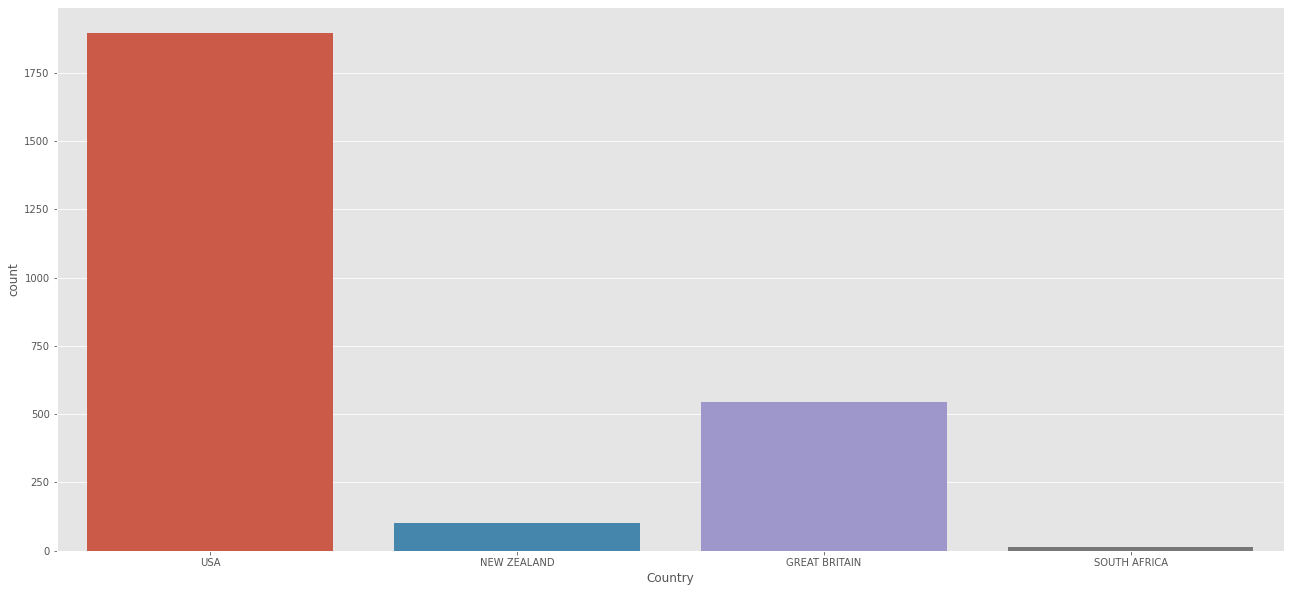

In [0]:
# Top de países que provocaron un ataque
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))  # Tamaño de la gráfica 
sns.countplot(aerial['Country'])
plt.show()

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


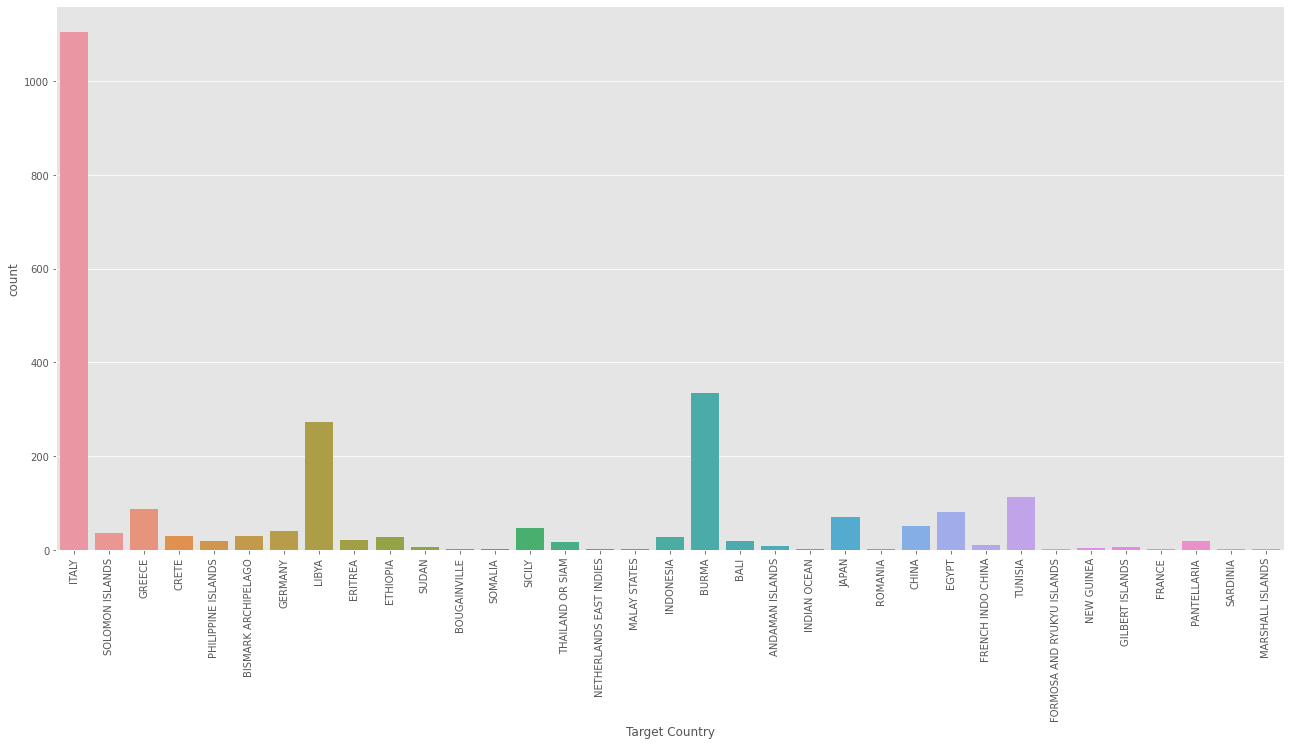

In [0]:
# Top de países objetivos de ataque
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10)) # Tamaño de la gráfica
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


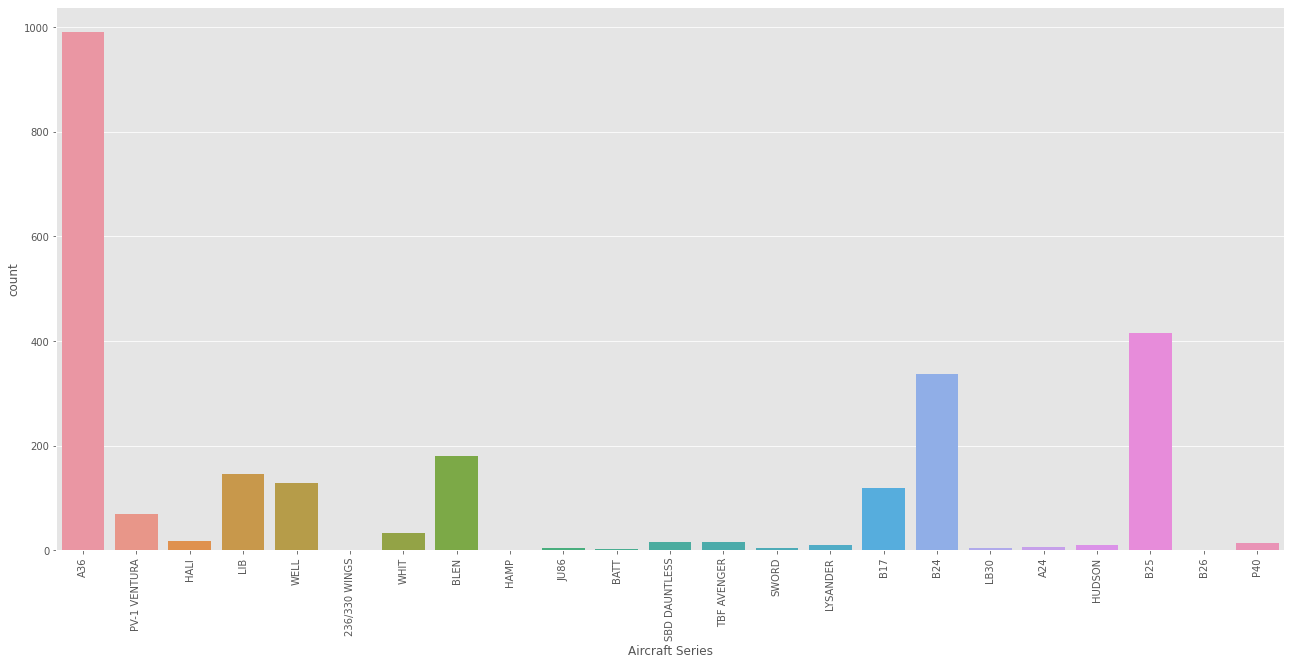

In [0]:
# Series de aviones
data = aerial['Aircraft Series'].value_counts()
print(data[:10]) # Top de las series de los 10 aviones más utilizados
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

plt.figure(figsize=(22,10)) # Tamaño de la gráfica
sns.countplot(aerial['Aircraft Series'])
plt.xticks(rotation=90)
plt.show()

#layout = dict(
#    title = 'Aircraft Series',
#)
#fig = go.Figure(data=data, layout=layout)
#iplot(fig)

* **Aeronave más utilizada: A36**
    * <a href="http://imgbb.com/"><img src="http://image.ibb.co/b3x66c/a36.png" alt="a36" border="0"></a>
* Visualizarémos ahora la base de los países que atacan.
    * En la siguiente gráfica, llama la atención el color azul, es USA y el rojo es Gran Bretaña.

In [0]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving img1.png to img1.png
Saving img2.png to img2.png
Saving img3.png to img3.png
Saving img4.png to img4.png
Saving img5.png to img5.png


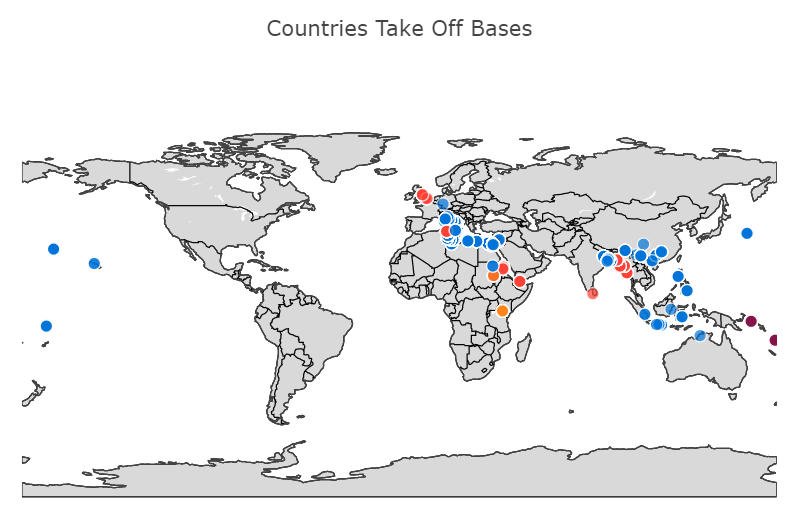

In [0]:
Image('img1.png', width=1000)


* Ahora vizualizarémos la ruta de bombardeo desde el país que proviene, y la base de este, hasta el país objetivo y la ciudad.

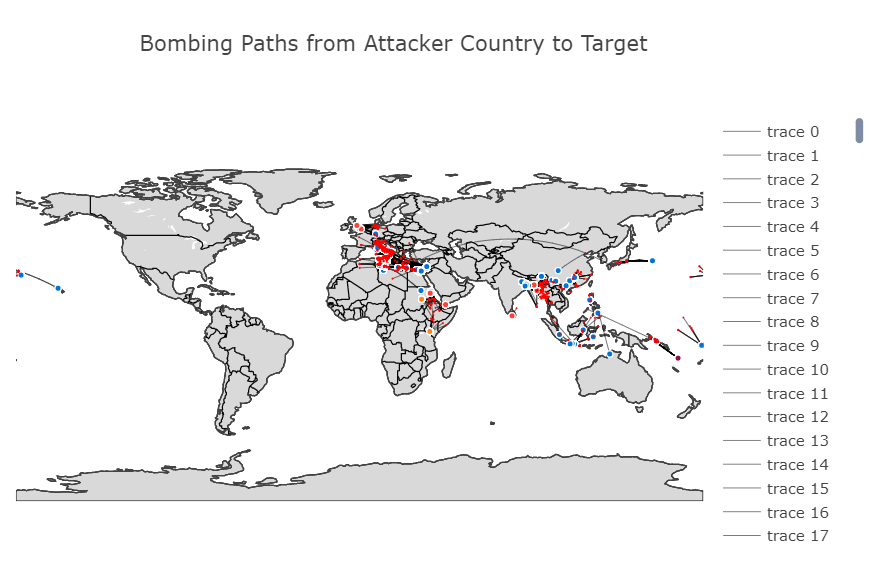

In [0]:
Image('img2.png', width=1000)

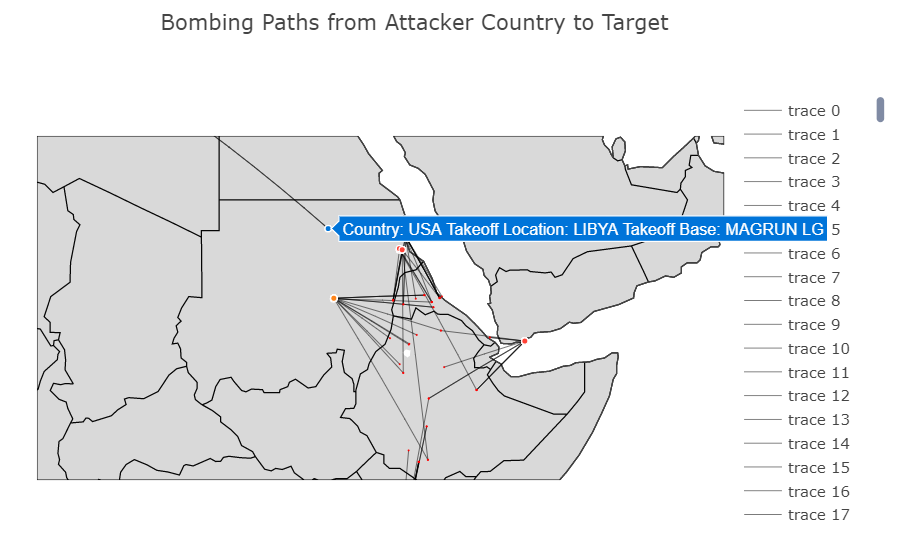

In [0]:
Image('img3.png', width=1000)

Como pueden ver en los caminos de bombardeo, la mayor parte del ataque de bombardeo se realiza en el teatro de operaciones del Mediterráneo.
**Theater of Operations:**
* ETO: European Theater of Operations
* PTO: Pasific Theater of Operations            
* MTO: Mediterranean Theater of Operations         
* CBI: China-Burma-India Theater of Operations                
* EAST AFRICA: East Africa Theater of Operations   
<a href="http://imgbb.com/"><img src="http://image.ibb.co/bYvFzx/mto.png" alt="mto" border="0"></a>

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


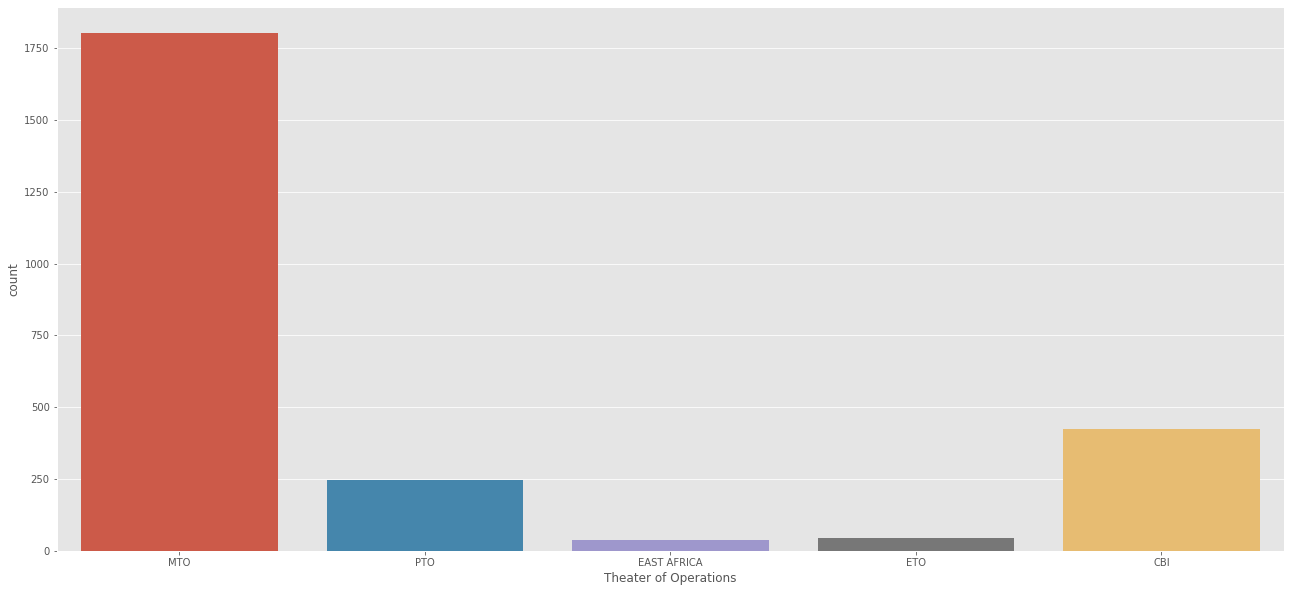

In [0]:
# Teatro de operaciones
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

* Las estaciones meteorológicas están abajo

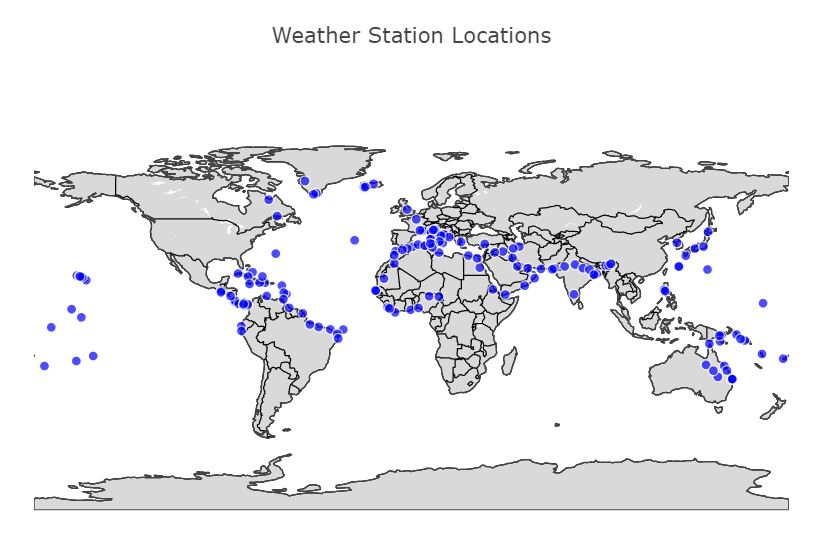

In [0]:
Image('img4.png', width=1000)

<hr>

## **Selección de Datos Muestrales**
* Nos enfocaremos en la guerra de **USA y BURMA**
* En esta guerra, USA bombardeó Burma (ciudad de KATHA) desde 1942 a 1945
* La estación meteorológica más cercana a esta guerra es BINDUKURI y tiene registros de temperatura de 1943 a 1945.
* Visualizaremos esta situación. Antes de esto, necesitamos hacer que la **caracteristica de fecha**, sean objeto de fecha y hora.

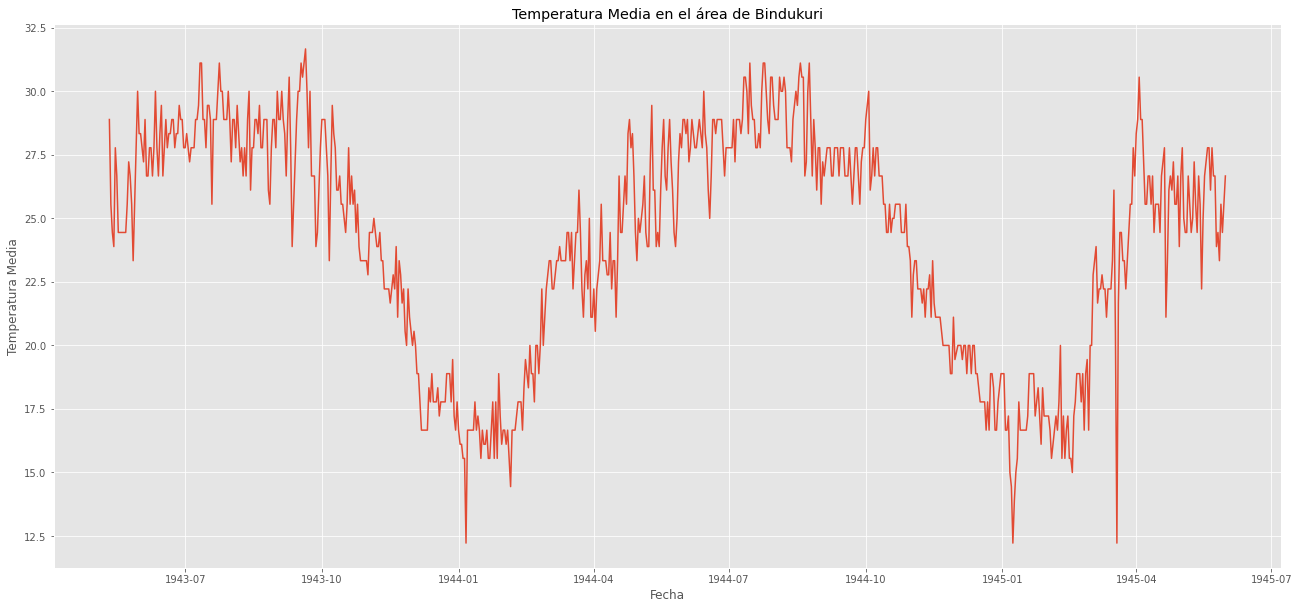

In [0]:
#Selección de la estación meteorlógica más cercana a Burma.
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
#Seleción de los datos registrados por la estación a traves de su ID.
weather_bin = weather[weather.STA == 32907]
#se convierte a formato fecha
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Temperatura Media en el área de Bindukuri")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media")
plt.show()


* Podemos observar que tenemos mediciones de temperatura **desde 1943 hasta 1945.**

* La temperatura varía entre 12 y 32 grados. 

* La temperatura de los meses de invierno es más fría que la de los meses de verano (se evidencia comportamiento de estacionalidad)
* Vamos a filtrar y seleccionar los datos de los operaciones de los bombardeos áreos que cumplan con los anteriores criterios.

In [0]:
#Se trata el dataframe para dividir años y meses.
aerial = pd.read_csv("./data/operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])
#Variables para datos de Bombardeo
attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

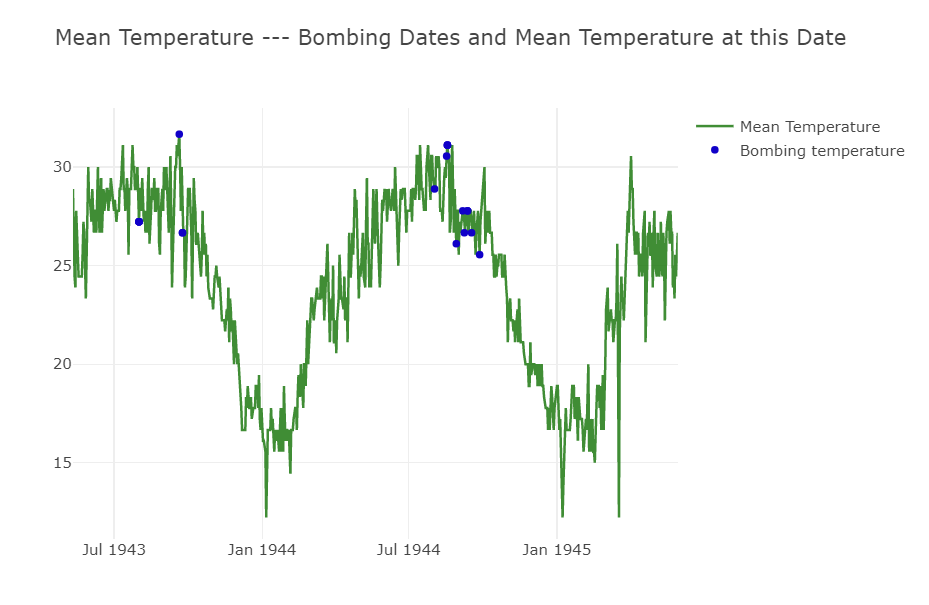

In [0]:
#Grafica de los bombardeos
Image('img5.png', width=1000)

* La línea verde es la **temperatura media** que se mide en Bindukuri.
* Los marcadores azules son las **fechas de bombardeo** y la **temperatura de la fecha de bombardeo.**
* Como se puede ver en la trama, EE.UU. tiende a bombardear a altas temperaturas.
  * La pregunta es si podemos predecir el clima futuro y de acuerdo con esta predicción podemos saber si los bombardeos se realizarán o no.
  * Para responder a esta pregunta, primero comencemos con la predicción de series de tiempo.

<a name="eje2" id="eje2" src="#eje2"></a>
## **Series de tiempo en el problema**
Los datos de las operaciones áereas y el clima posees la siguiente característica:
* La serie temporal es una colección de puntos de datos que se recopilan a intervalos de tiempo constantes.
* Es dependiente del tiempo.
* La mayoría de las series temporales tienen alguna forma de **tendencias de estacionalidad**.
<br/>
<br/>
<h3>Estacionaridad de la Serie de tiempo</h3>
* Como vimos en el curso, hay tres criterios básicos para distinguir que una serie de tiempo es una serie estacionaria o no.
     * Las propiedades estadísticas de las series de tiempo, como la media, la varianza debe permanecer constante a lo largo del tiempo para llamarla **serie de tiempo es estacionaria**
         * Media constante
         * Varianza constante
         * Autocovarianza que no depende del tiempo. La autocovarianza es la covarianza entre series de tiempo y series de tiempo rezagadas(lag).
* Verificaremos la tendencia estacional de nuestra serie de tiempo.
* Se asiganará formato de serie de tiempo al Clima

<hr>

<a name="eje3" id="eje3" src="#eje3"></a>
## **PARTE A - Procedimiento para predicción del clima**

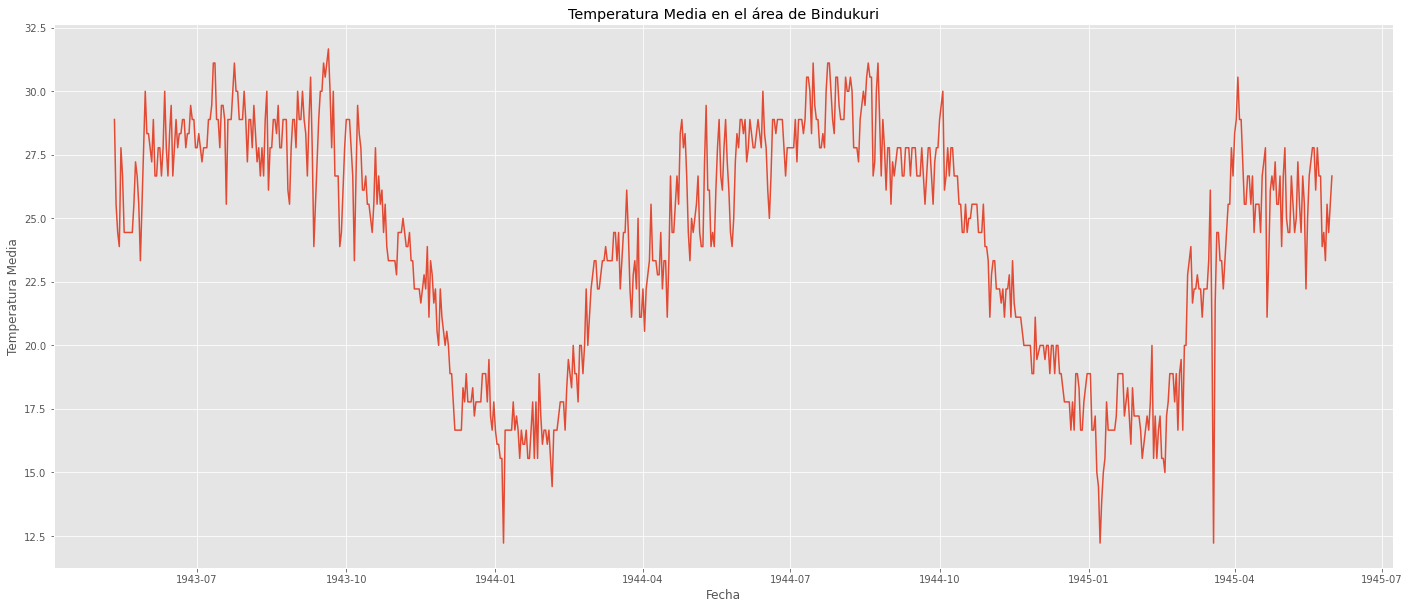

In [0]:
# Temperatura Media en el área de Bindukuri
plt.figure(figsize=(24,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Temperatura Media en el área de Bindukuri")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media")
plt.show()

# vamos a crear series de tiempo para el clima
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

* Como puede ver en la gráfica anterior, nuestra serie temporal tiene variaciones estacionales. En verano, la temperatura media es más alta y en invierno la temperatura media es más baja para cada año.
* Ahora verifiquemos que la serie de tiempo es estacionarias. Podemos verificar la estacionariedad utilizando los siguientes métodos:
     * Trazar estadísticas de Media móvil (rolling mean):  se tiene un tamaño ventana igual 6. Luego, encontramos la media y la varianza para verificar estacionaridad.
     * Prueba de Dickey-Fuller: Los resultados de la prueba se componen de una **Estadística de prueba** y algunos **Valores críticos** para niveles de confianza diferentes. Si el **estadístico de prueba** es menor que el **valor crítico**, podemos decir que la series de tiempo es estacionarias

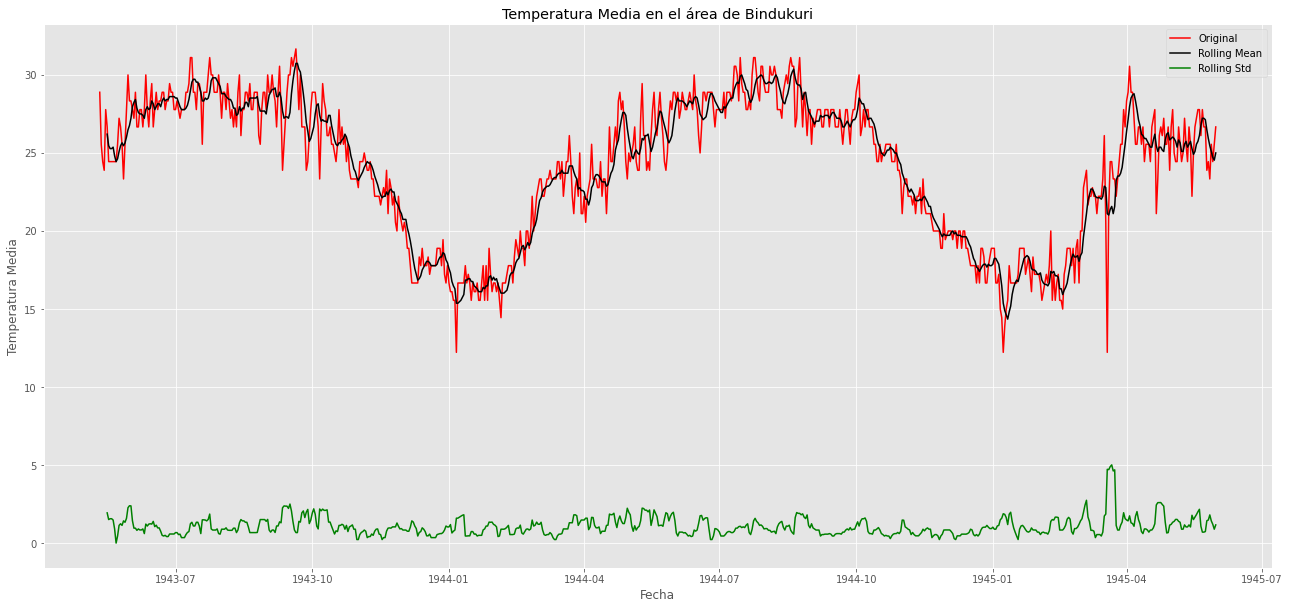

Test statistic:  -1.4095966745887762
p-value:  0.5776668028526354
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [0]:
# adfuller library 

from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.title("Temperatura Media en el área de Bindukuri")
    plt.xlabel("Fecha")
    plt.ylabel("Temperatura Media")
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)


* Nuestro **primer** criterio para verificar es la media constante. Este falla porque la media no es constante como se puede ver en la gráfica (línea negra) arriba. Por lo tanto, no es estacionaria.
* El **segundo** es la varianza constante. Parece constante. (sí estacionario)
* La **tercera** es que si el *estadístico de prueba* es menor que el *valor crítico*, podemos decir que las series temporales son estacionarias. Miremos:
     * Estadístico de prueba = -1.4
     * Valores críticos = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10% ': -2.5688568756191392}. La estadística de prueba es más grande que los valores críticos. (no estacionario)
* Como resultado, nos aseguramos de que la serie de tiempo no sea estacionaria.
* Se convertirá la series de tiempo a estacionaria en la siguiente parte.

### **Conversión a series de tiempo estacionaria**
* Como mencionamos anteriormente, hay dos razones detrás de la no estacionalidad de las series de tiempo.
     * Tendencia: media variable con el tiempo. Necesitamos una media constante para series estacionarias de tiempo.
     * Estacionalidad: variaciones en un momento específico. Necesitamos variaciones constantes para las series de tiempo estacionarias.
* Primero resuelveremos el problema de **tendencia (media constante)**
     * El método más popular es la media móvil (moving average).
      * Media móvil: tenemos una ventana que toma el promedio sobre la muestra anterior 'n'. 'n' es el tamaño de la ventana.

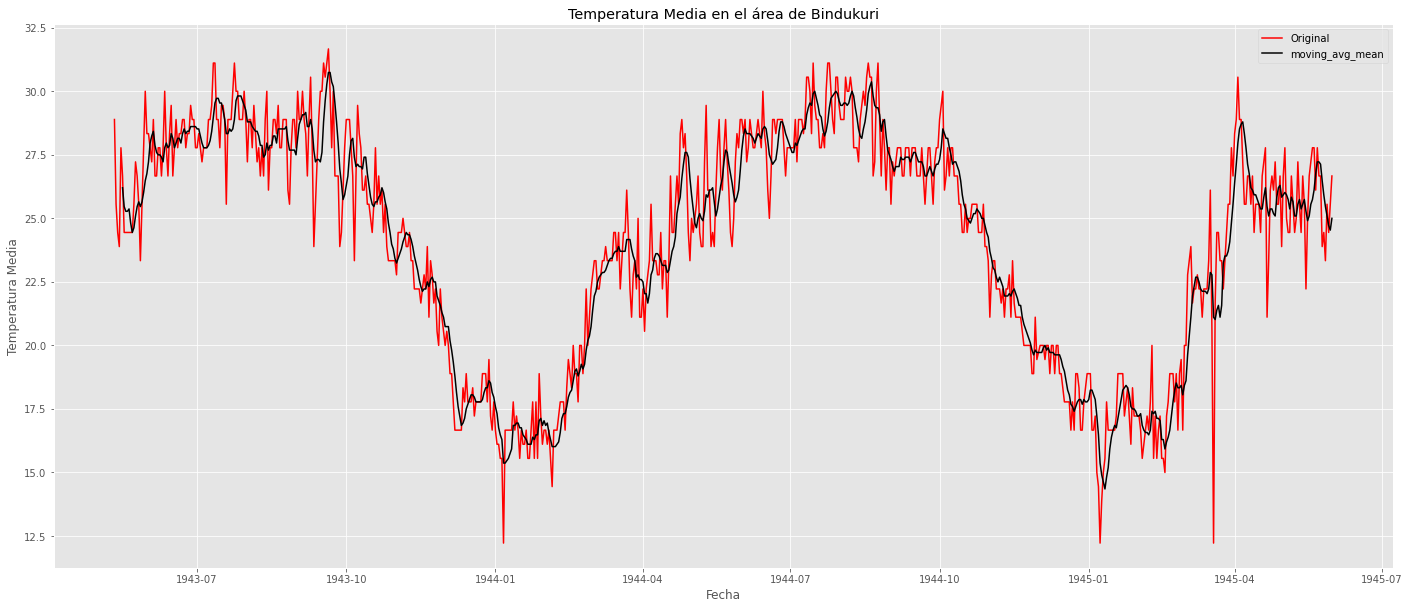

In [0]:
import pandas as pd
# Metodo Moving average
window_size = 6
moving_avg = ts.rolling(window_size).mean()
plt.figure(figsize=(24,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Temperatura Media en el área de Bindukuri")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media")
plt.legend()
plt.show()

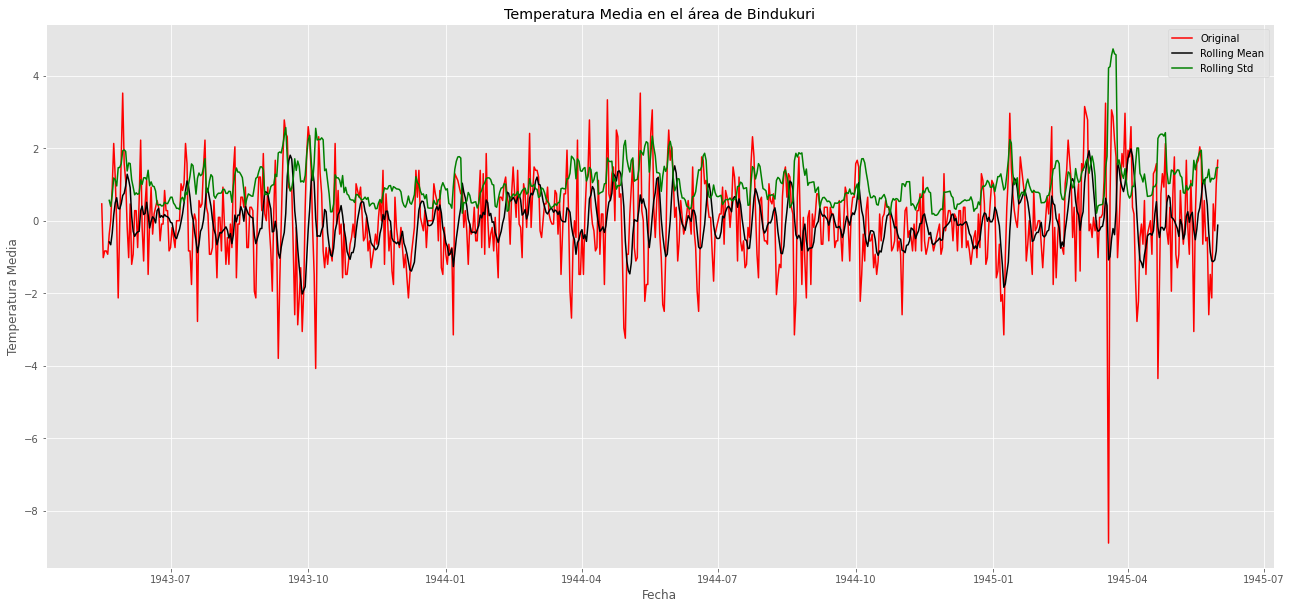

Test statistic:  -11.138514335138476
p-value:  3.150868563164562e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [0]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # los primeros 6 is valores son NaN por el tamaño de ventana

# Verficar estacionaridad: media, varianza(std) y test de adfuller

check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

* Criterio de media constante: la media tiene un comportamiento constante como se puede ver en la gráfica (línea negra) arriba. *(sí estacionario)*
* El segundo es la varianza constante. Parece constante. *(sí estacionario)*
* El estadístico de prueba es más pequeño que los valores críticos del 1%, por lo que podemos decir con un 99% de confianza que se trata de una serie estacionaria. *(sí estacionario)*
* Logramos series de tiempo estacionarias. Sin embargo, veamos un método más para **evitar la tendencia y la estacionalidad.**
     * Método de diferenciación

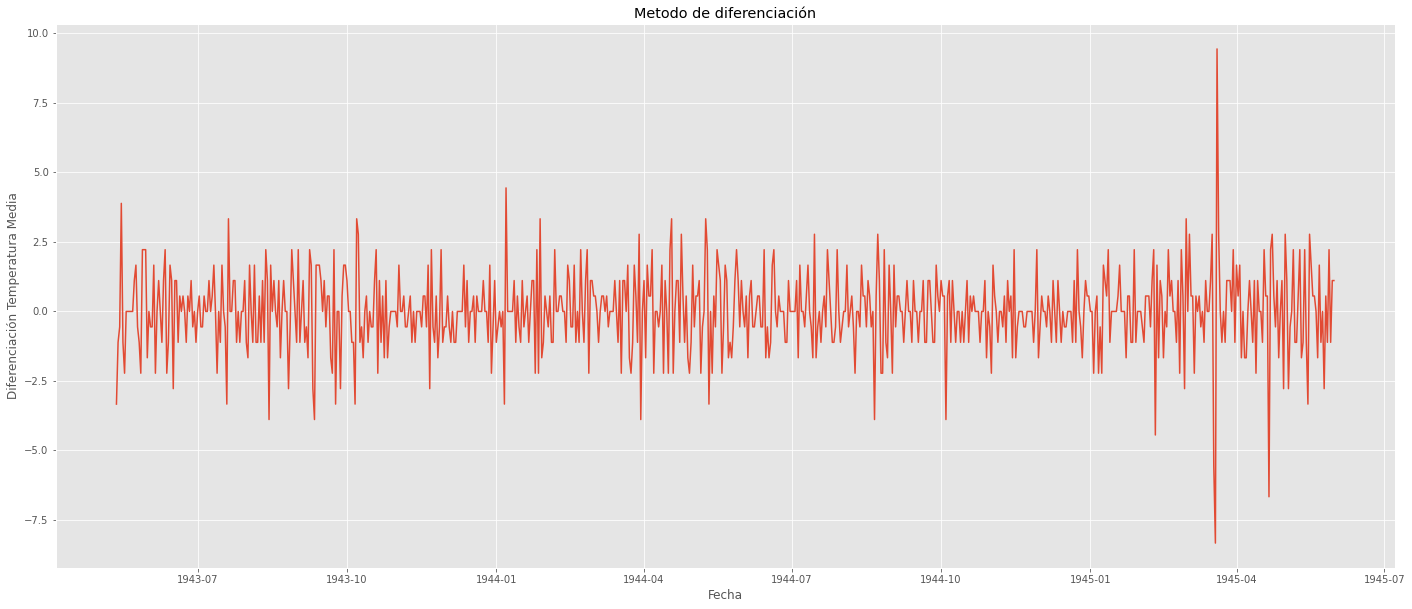

In [0]:
# Metodo de diferenciación
ts_diff = ts - ts.shift()
plt.figure(figsize=(24,10))
plt.plot(ts_diff)
plt.title("Metodo de diferenciación") 
plt.xlabel("Fecha")
plt.ylabel("Diferenciación Temperatura Media")
plt.show()

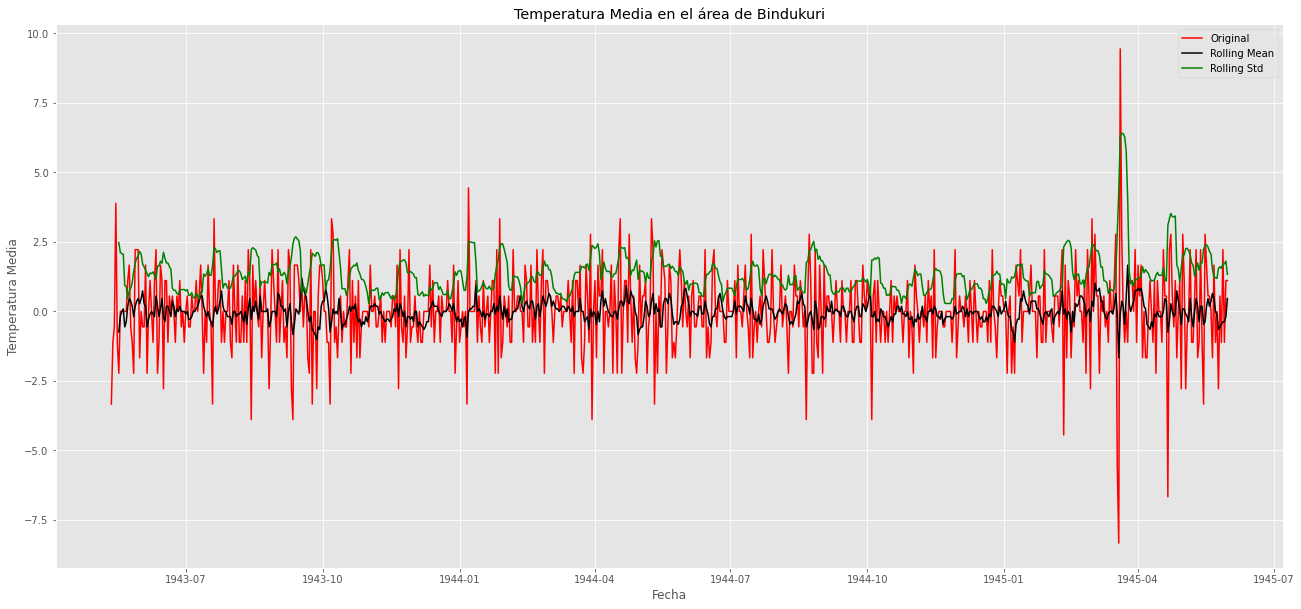

Test statistic:  -11.678955575105368
p-value:  1.7602075693559596e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [0]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

* Criterio de media constante: la media se ve constante como se puede ver en la gráfica (línea negra) arriba. (sí estacionario)
* El segundo es la varianza constante. Parece constante. (sí estacionario)
* El estadístico de prueba es más pequeño que los valores críticos del 1%, por lo que podemos decir con un 99% de confianza que se trata de una serie estacionaria. (sí estacionario)

### **Descomposición**
La descomposición de series de tiempo es una tarea estadística que deconstruye una serie de tiempo en varios componentes, cada uno de los cuales representa una de las categorías subyacentes de patrones. Con la librería stats model  podremos ver los componentes de tendencia, estacionales y residuales de nuestros datos.

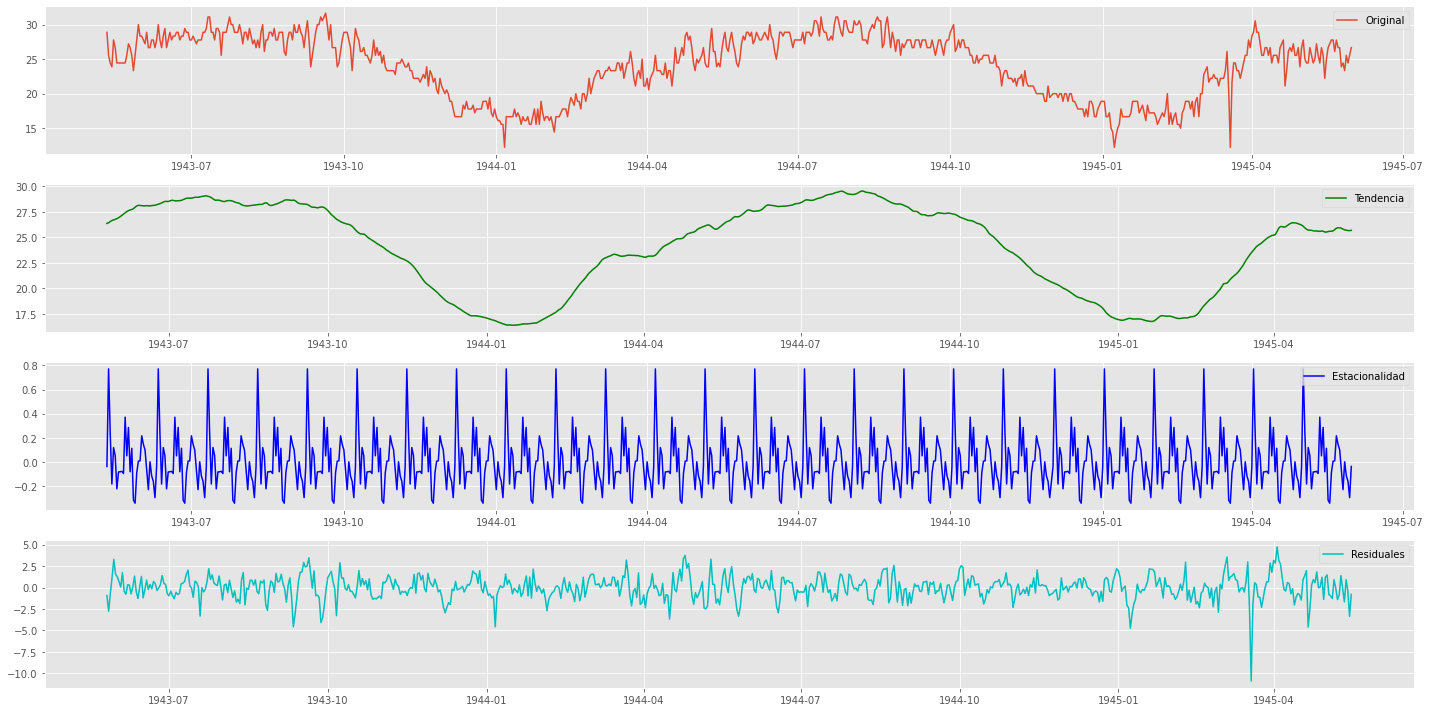

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendencia', c='g')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad', c='b')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuales', c='c')
plt.legend(loc='best')

plt.tight_layout()

### **<h2> Modelos y predicciones** </h2>

#### **Simple Exponential Smoothing**
SES es una buena opción para pronosticar datos sin tendencia clara o patrón estacional como se evidencia en la tendencia de la anterior descomposición de la series de tiempo.
Todos los pronósticos para el futuro son iguales al último valor observado de la serie (naïve method): 
<center>$\hat{y}_{T+h|T} = y_{T}$</center>

* Por lo tanto, el naïve method supone que la observación más reciente es la única importante, y todas las observaciones anteriores no proporcionan información para el futuro. Esto puede considerarse como un promedio ponderado donde se asigna todo el peso a la última observación.

* función de pronóstico "plana": todos los pronósticos toman el mismo valor igual al componente del último nivel.

* Optimización: Los parámetros de suavizado se pueden elegir de manera subjetiva; podemos elegir un valor de los parámetros de suavizado como $\alpha$ en función de la experiencia previa. Sin embargo, una forma más confiable y objetiva de obtener valores para los parámetros desconocidos es estimarlos a partir de los datos históricos u obsevados.

  * Usaremos $\alpha = 0.2, \alpha = 0.6, \alpha=estimado $ 

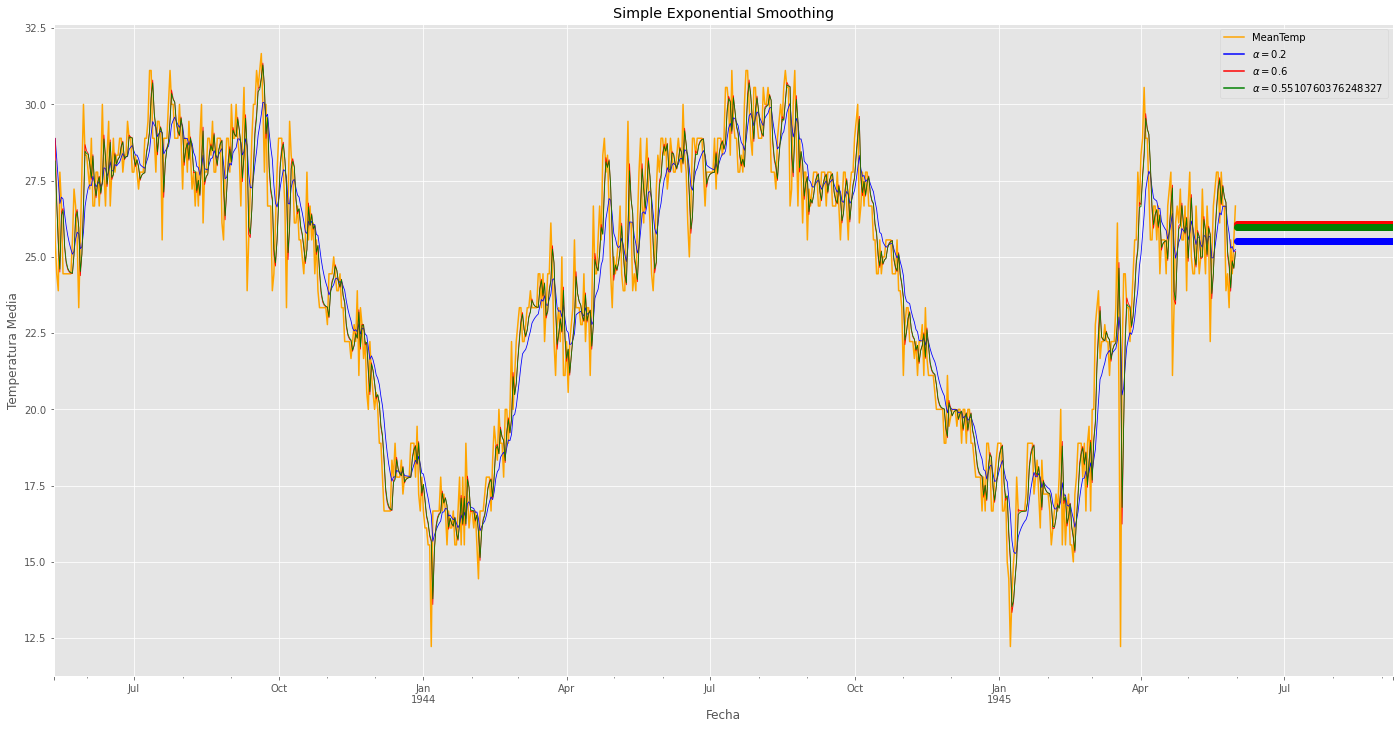

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#indices con formato dia para graficar predicción SES
timeSeries2 = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries2.index = timeSeries2.Date
timeSeries2.index = pd.DatetimeIndex(timeSeries2.index).to_period('D')
ts2 = timeSeries2.drop("Date",axis=1)

fit1 = SimpleExpSmoothing(ts2).fit(smoothing_level=0.2,optimized=False)
# print(fit1.fittedvalues)
fcast1 = fit1.forecast(100).rename(r'$\alpha=0.2$')
# print(np.min(fcast1))
fit2 = SimpleExpSmoothing(ts2).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(100).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(ts2).fit()
fcast3 = fit3.forecast(100).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = ts2.plot(color='orange', figsize=(24,12))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(ax=ax, color='blue', linewidth=0.8)
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(ax=ax, color='red', linewidth=0.8)
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(ax=ax, color='green', linewidth=0.8)
plt.title('Simple Exponential Smoothing') 
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media")
plt.show()

Los intervalos de predicción muestran que existe una considerable incertidumbre en los valores futuros de la temperatura medía durante el período de pronóstico de 3 meses. Por lo tanto, interpretar los pronósticos puntuales sin tener en cuenta la gran incertidumbre puede ser muy engañoso.

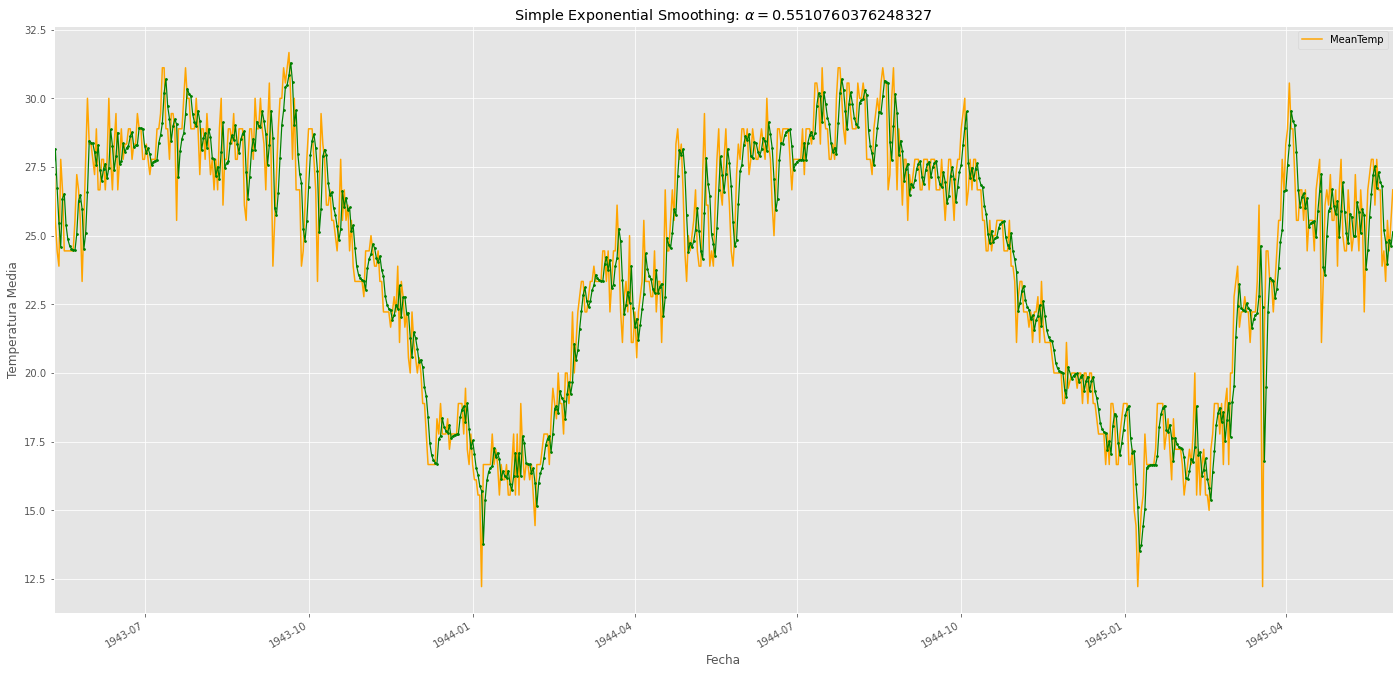

In [0]:
fit3 = SimpleExpSmoothing(ts2).fit()
ax = ts.plot(color='orange', figsize=(24,12))
fit3.fittedvalues.plot(ax=ax, marker='o', markersize=1.7, color='green', linewidth=1.2)
plt.title('Simple Exponential Smoothing: ' + r'$\alpha=%s$'%fit3.model.params['smoothing_level']) 
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media")
plt.show()

In [0]:
# Función que retorna métricas de Precisión (Acurracy metrics) para Modelos
# Hecho para proyecto final del simulación digital 03/2020
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

def forecast_accuracy(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred): 
      y_true, y_pred = np.array(y_true), np.array(y_pred)
      return np.mean(np.abs((y_true - y_pred) / y_true))
  mape = mean_absolute_percentage_error(y_true, y_pred)
  evs = explained_variance_score(y_true, y_pred)
  #Explained variance regression score function
  me = max_error(y_true, y_pred)
  #metric calculates the maximum residual error.
  mae = mean_absolute_error(y_true, y_pred)
  #Mean absolute error regression loss
  mse = mean_squared_error(y_true, y_pred)
  #Mean squared error regression loss
  rmse = np.sqrt(mse)
  # root-mean-square deviation 
  msle = mean_squared_log_error(y_true, y_pred)
  #Mean squared logarithmic error regression loss
  meae = median_absolute_error(y_true, y_pred)
  #Median absolute error regression loss
  return {'mape':mape, 'evs':evs, 'maxerror':me, 'mae': mae, 'rmse':rmse,'mse':mse, 'msle':msle, 'meae':meae}

Métricas de precisión (Modelo SES)

In [0]:
#Utilizamos los datos de predicción o experimentales de fit3 (alpha =0.5)
forecast_accuracy(ts.values, fit3.forecast(751))


{'evs': -2.220446049250313e-16,
 'mae': 3.792094420610824,
 'mape': 0.1879491106823871,
 'maxerror': 13.75838254331966,
 'meae': 2.908284126680339,
 'mse': 23.373329803715734,
 'msle': 0.0444295079274774,
 'rmse': 4.834597170780182}

**Análisis de errores:** Alrededor de 18.7% MAPE implica que el modelo tiene una precisión aproximada de 81.3% para predección. Para RMSE = 4.83 (los valores más cercanos a cero son mejores).

#### **ARIMA**
* Para la predicción (pronóstico) utilizaremos *ts_diff* que son el resultado del método de diferenciación.
* También el método de predicción es ARIMA, que son medias móviles integradas autorregresivas.
     * AR: Auto-regresivo (p)
     * I: Integrado (d): por ejemplo, en nuestro caso ya tomamos la diferencia de primer orden con *ts_diff*. Entonces pasamos esa variable y ponemos d = 0
     * MA: medias móviles (q): los términos MA son errores de pronóstico rezagados en la ecuación de predicción.
* (p, d, q) son parámetros del modelo ARIMA.
* Para elegir los parámetros p, d, q utilizaremos dos gráficos diferentes.
     * Función de autocorrelación (ACF): medición de la correlación entre series de tiempo y versiones rezagadas (lags) de series de tiempo.
     * Función de autocorrelación parcial (PACF): mide la correlación entre la serie de tiempo y la versión retrasada de la serie de tiempo, pero después de eliminar las variaciones ya explicadas por las comparaciones intermedias.
* Los intervalos de predicción para los modelos ARIMA se basan en suposiciones de que los residuos no están correlacionados y normalmente están distribuidos. (si se cumple)

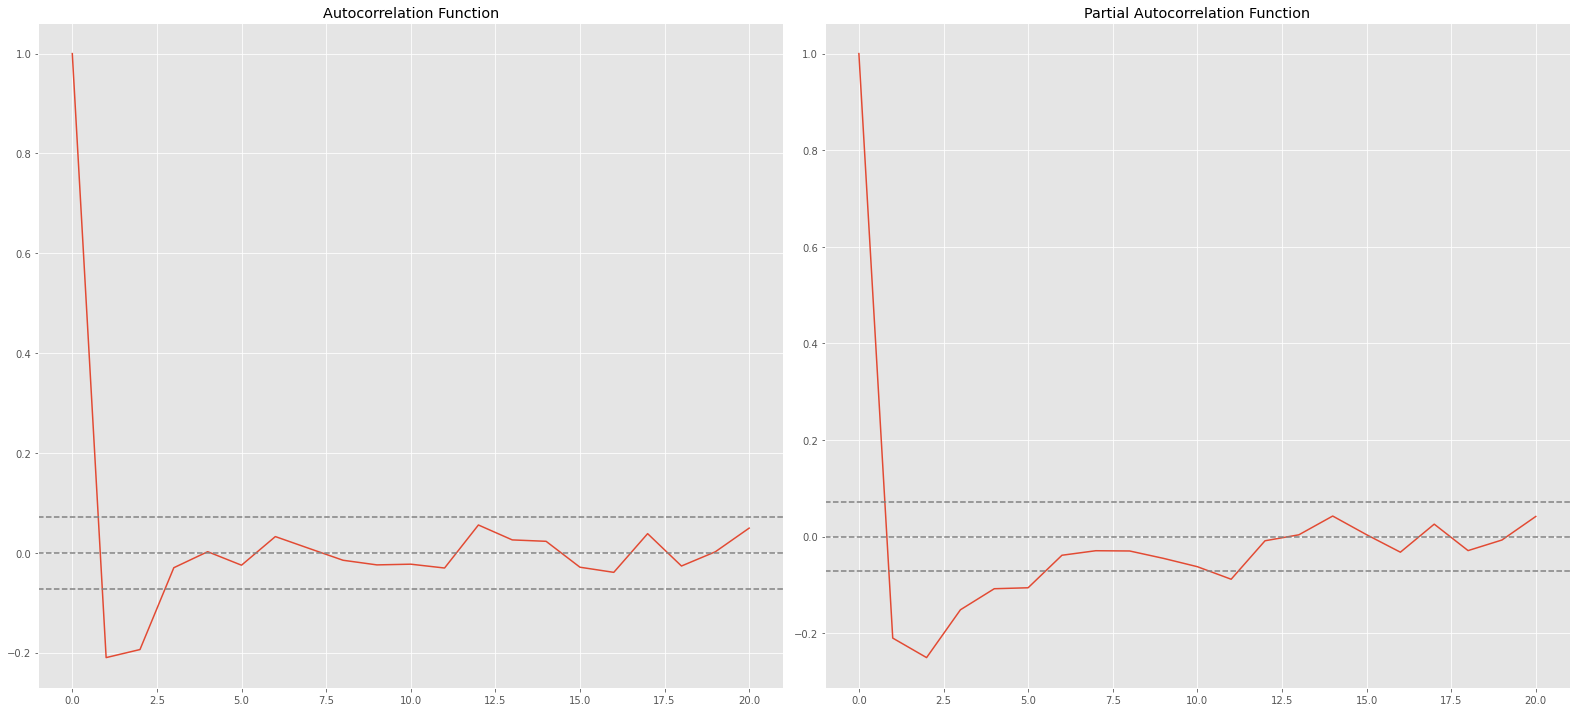

In [0]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

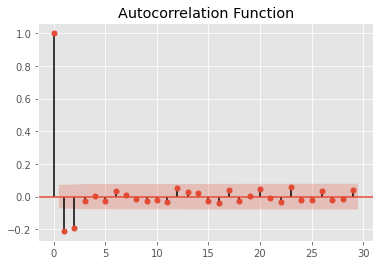

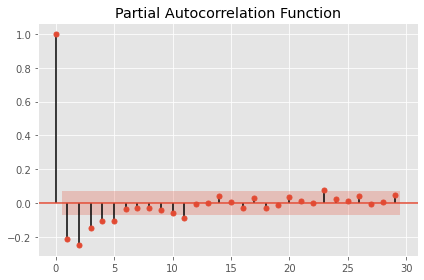

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plt.figure(figsize=(10,5))

# plt.subplot(121) 

plot_acf(ts_diff)
plt.title('Autocorrelation Function')


# plt.subplot(122)
plot_pacf(ts_diff)
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* Dos líneas punteadas son los intervalos de confianza. Usamos estas líneas para determinar los valores de "p" y "q"
     * Elegir p: el valor de retraso (lag value) donde el gráfico PACF cruza el intervalo de confianza superior por primera vez. p = 1.
     * Elegir q: El valor de retraso (lag value) donde el gráfico ACF cruza el intervalo de confianza superior por primera vez. q = 1.
* Ahora usemos (1,0,1) como parámetros de los modelos ARIMA y pronostiquemos
     * ARIMA: de statsmodels libarary
     * fecha y hora: lo usaremos índices de inicio y fin del método de predicción

In [0]:
#Cantidad de datos
ts.size

751

* Vamos a predecir y visualizar todos los valores de la predicción:

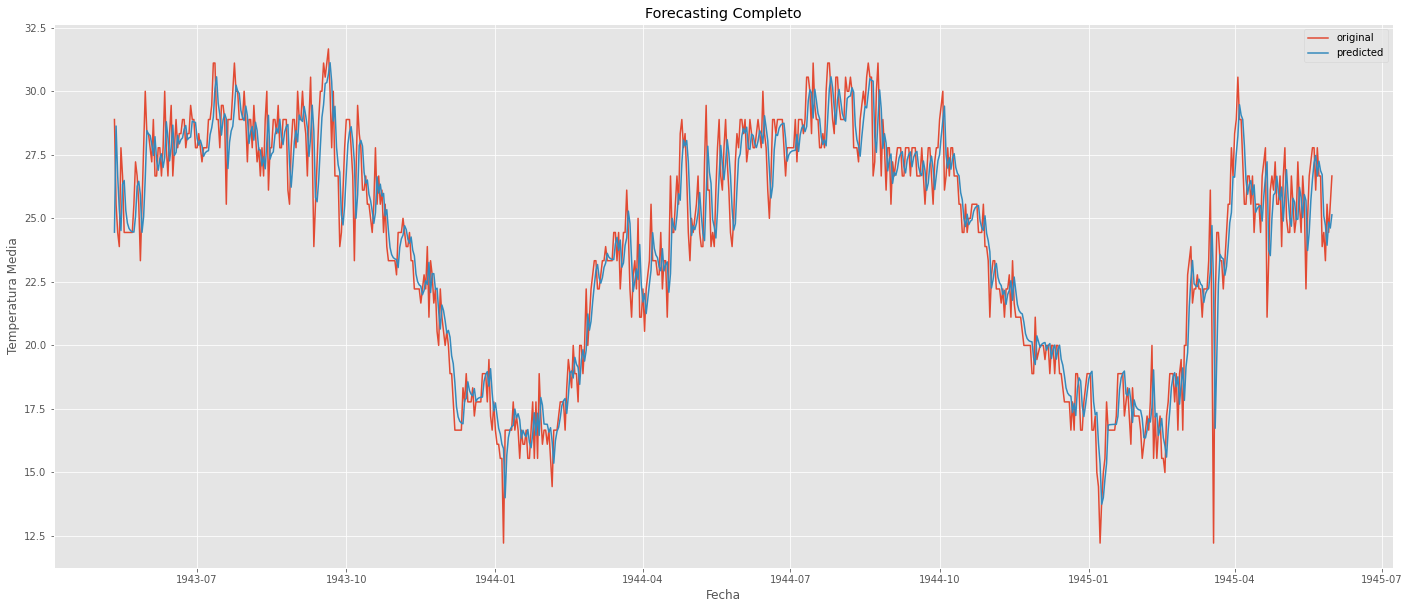

In [0]:
# Predicción de todos los valores

# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
# visualization
plt.figure(figsize=(24,10))
plt.plot(ts,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Forecasting Completo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media")
plt.legend()
plt.savefig('graph.png')


plt.show()

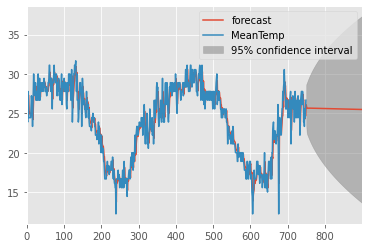

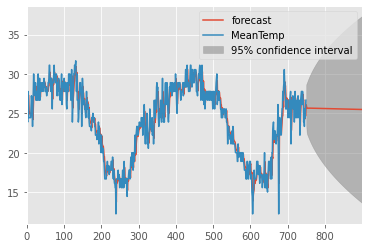

In [0]:
model_fit2.plot_predict(1,900) 

Métricas de precisión (Modelo ARIMA)

In [0]:
forecast_accuracy(ts.values, forecast2)

{'evs': 0.9063526656494741,
 'mae': 1.021617430487444,
 'mape': 0.22223843693300172,
 'maxerror': 10.164219515636708,
 'meae': 0.8172024522577992,
 'mse': 1.8625819204267187,
 'msle': 0.003395640490434243,
 'rmse': 1.3647644193877266}

**Análisis de errores:** Alrededor de 22.2% en MAPE, implica que el modelo tiene una precisión aproximada de 77.8% para predección. Para RMSE = 1.36 (los valores más cercanos a cero son mejores).

#### **SARIMA**

**¿Por qué aplicaremos SARIMA?**

El problema con el modelo ARIMA simple es que no admite estacionalidad.
La serie de tiempo analizada ha definido estacionalidad, por lo tanto se puede utilizar la diferenciación estacional. La diferenciación estacional es similar a la diferenciación regular, pero, en lugar de restar términos consecutivos, resta el valor de la temporada anterior.

<img src="https://i.imgur.com/bIzo2Wi.png=25x" alt="drawing" width="325"/>

**Criterio de información de Akaike (AIC)**<br>
El criterio de información de Akaike (AIC) es un estimador de la calidad relativa de los modelos estadísticos para un conjunto dado de datos. Dada una colección de modelos para los datos, AIC estima la calidad de cada modelo, en relación con cada uno de los otros modelos.

* El valor de AIC nos permitirá comparar qué tan bien un modelo se ajusta a los datos y tiene en cuenta la complejidad de un modelo. 

* Los modelos generados tienen un mejor ajuste al usar menos características recibirán una mejor puntuación de AIC (menor) que modelos similares que utilizan más características.

*SARIMA con pyramid (Grid Search)*

In [0]:
!pip3 install pyramid-arima

In [0]:
#Se contruye el modelo SARIMA usando pmdarima. 
#Para hacer eso, se establece la frecuencia de las series mensuales 
#y con los parametros auto_arima()seasonal=True, m=12, D=1->Por la diferenciación simple


from pyramid.arima import auto_arima
stepwise_model = auto_arima(ts, start_p=2, start_q=1,
                           max_p=2, max_q=1, m=12,
                           start_P=1, max_P=1, start_Q=1, max_Q=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2564.886, BIC=2597.114, Fit time=11.981 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3089.709, BIC=3098.917, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2885.350, BIC=2903.765, Fit time=1.122 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2614.094, BIC=2632.510, Fit time=8.325 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2566.250, BIC=2593.873, Fit time=9.814 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=2787.893, BIC=2815.516, Fit time=4.082 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2948.355, BIC=2971.375, Fit time=2.261 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2567.493, BIC=2595.117, Fit time=10.979 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=2600.253, BIC=2627.876, Fit time=8.358 seconds
Fit ARIMA: order=(1, 1, 0)

In [0]:
# Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2569.612, BIC=2592.631, Fit time=12.820 seconds
# Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3089.709, BIC=3098.917, Fit time=0.082 seconds
# Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2885.350, BIC=2903.765, Fit time=1.483 seconds
# Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2614.094, BIC=2632.510, Fit time=11.080 seconds
# Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2567.493, BIC=2595.117, Fit time=14.591 seconds
# Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=2786.104, BIC=2809.124, Fit time=3.959 seconds
# Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2570.027, BIC=2602.255, Fit time=32.513 seconds
# Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2946.687, BIC=2965.103, Fit time=1.528 seconds
# Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=2569.622, BIC=2606.453, Fit time=39.516 seconds
# Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2611.554, BIC=2634.574, Fit time=9.553 seconds
# Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2564.886, BIC=2597.114, Fit time=16.012 seconds
# Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=2600.253, BIC=2627.876, Fit time=10.926 seconds
# Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=2566.149, BIC=2602.981, Fit time=17.229 seconds
# Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=2648.582, BIC=2671.602, Fit time=8.516 seconds
# Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=2571.033, BIC=2612.469, Fit time=18.639 seconds
# Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2566.250, BIC=2593.873, Fit time=13.130 seconds
# Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=2569.455, BIC=2606.286, Fit time=39.526 seconds
# Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=2787.893, BIC=2815.516, Fit time=5.483 seconds
# Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2566.768, BIC=2603.600, Fit time=38.156 seconds
# Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2948.355, BIC=2971.375, Fit time=3.099 seconds
# Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=2567.556, BIC=2608.992, Fit time=39.041 seconds
# Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2566.096, BIC=2602.927, Fit time=16.993 seconds
# Total fit time: 353.890 seconds
# 2564.886294309881

In [0]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  751
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1275.443
Date:                            Tue, 31 Mar 2020   AIC                           2564.886
Time:                                    07:00:15   BIC                           2597.114
Sample:                                         0   HQIC                          2577.314
                                            - 751                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.001      0.493      0.622      -0.001       0.002
ar.L1          0.4019      0.053      7.519      0.000       0.297       0.507
ar.L2         -0.1009      0.040     -2.547      0.011      -0.178      -0.023
ma.L1         -0.7462      0.054    -13.923      0.000      -0.851      -0.641
ar.S.L12       0.0692      0.038      1.845      0.065      -0.004       0.143
ma.S.L12      -0.9953      0.119     -8.371      0.000      -1.228      -0.762
sigma2         1.7448      0.186      9.367      0.000       1.380       2.110
===================================================================================
Ljung-Box (Q):                       34.59   Jarque-Bera (JB):               401.37
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                            -0.59
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El modelo ha estimado que el AIC y los valores P>|z| de los coeficientes parecen significativos. 

El mejor modelo tiene un AIC de 2564 y los valores P son significativos.	SARIMAX(2, 1, 1)x(1, 1, 1, 12)	

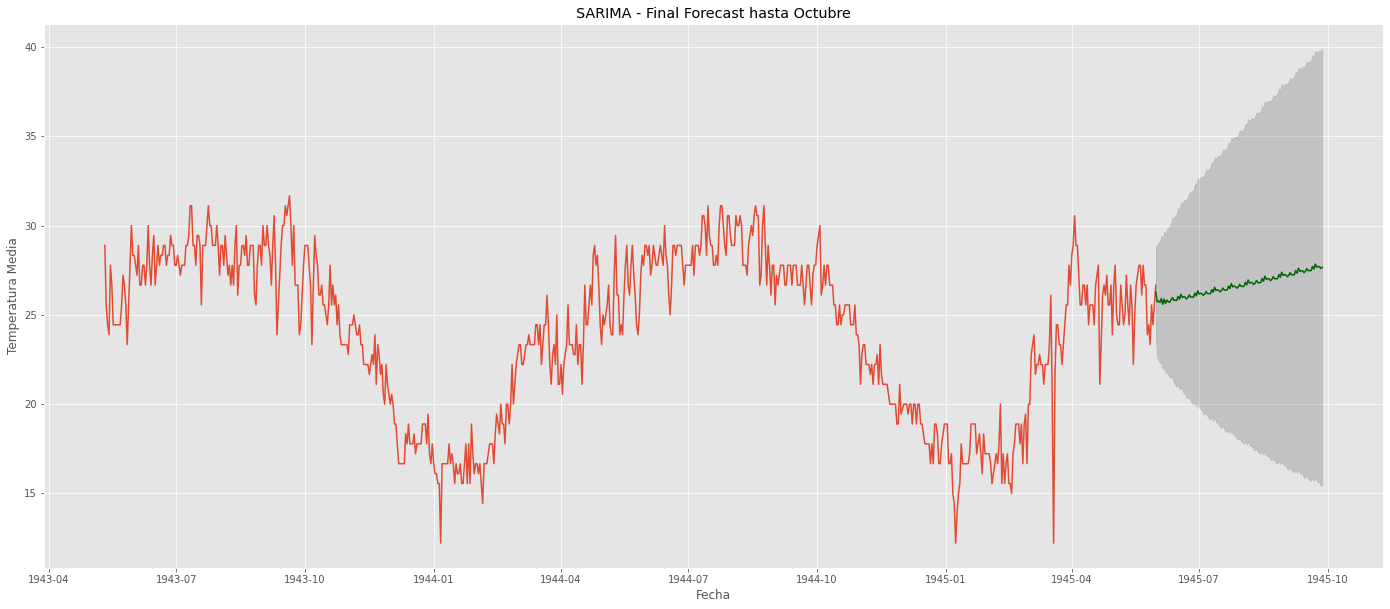

In [0]:
# Forecast para octubre (1945/10)
n_periods = 120
fitted, confint = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(ts.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(24,10))
plt.plot(ts)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast hasta Octubre")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Media")
plt.show()


Métricas de precisión (Modelo SARIMA)

In [0]:
fitted2 = stepwise_model.predict_in_sample()
forecast_accuracy(ts.values, fitted2)

{'evs': 0.8366990615251135,
 'mae': 1.0918422087621742,
 'mape': 0.22737811001671562,
 'maxerror': 28.88837852859036,
 'meae': 0.869284426845649,
 'mse': 3.2478767944488784,
 'msle': 0.019063921755180877,
 'rmse': 1.8021866702561304}

**Análisis de errores:** Alrededor de 22.2% en MAPE, implica que el modelo tiene una precisión aproximada de 77.8% para predección. Para RMSE = 1.80 (los valores más cercanos a cero son mejores).

<HR>

<a name="eje4" id="eje4" src="#eje4"></a>
## **PARTE B - Cantidad de operaciones aéreas**

### **Conversión a series de tiempo**

In [0]:
#Se trata el dataframe para dividir años y meses.
aerial = pd.read_csv("./data/operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

#Variables para datos de Bombardeo
attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
# aerial_war = aerial_war[aerial_war["Target City"] == city]

#Obteniedo el conteo para cada fecha
nuevos = pd.DataFrame({'cantidadOperaciones' : aerial_war.groupby( ["Mission Date"] ).size()}).reset_index() 

#Conversion a series de tiempo con index
nuevos.index = nuevos["Mission Date"]
ts3 = nuevos.drop("Mission Date",axis=1)

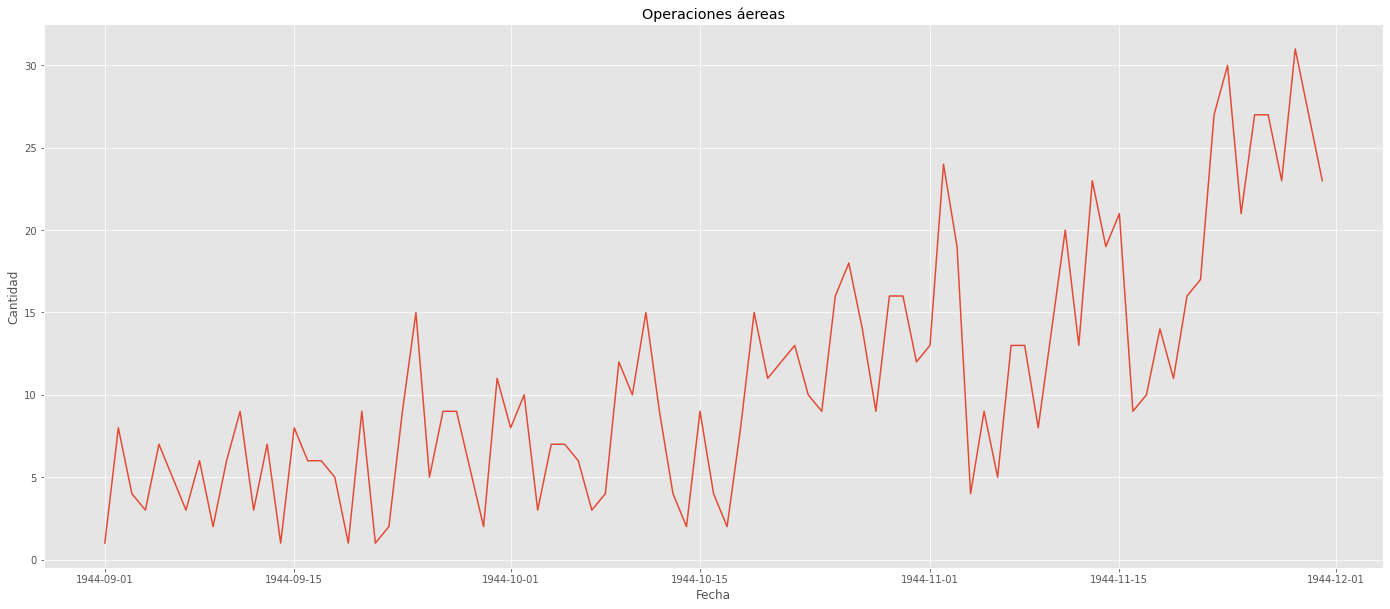

In [0]:
plt.figure(figsize=(24,10))
# plt.plot(aerial_war["Mission Date"].values,aerial_war["Total Weight (Tons)"].values)
ts4 = ts3.loc['1944-09':'1944-11']
plt.plot(ts4)
plt.title("Operaciones áereas")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.show()

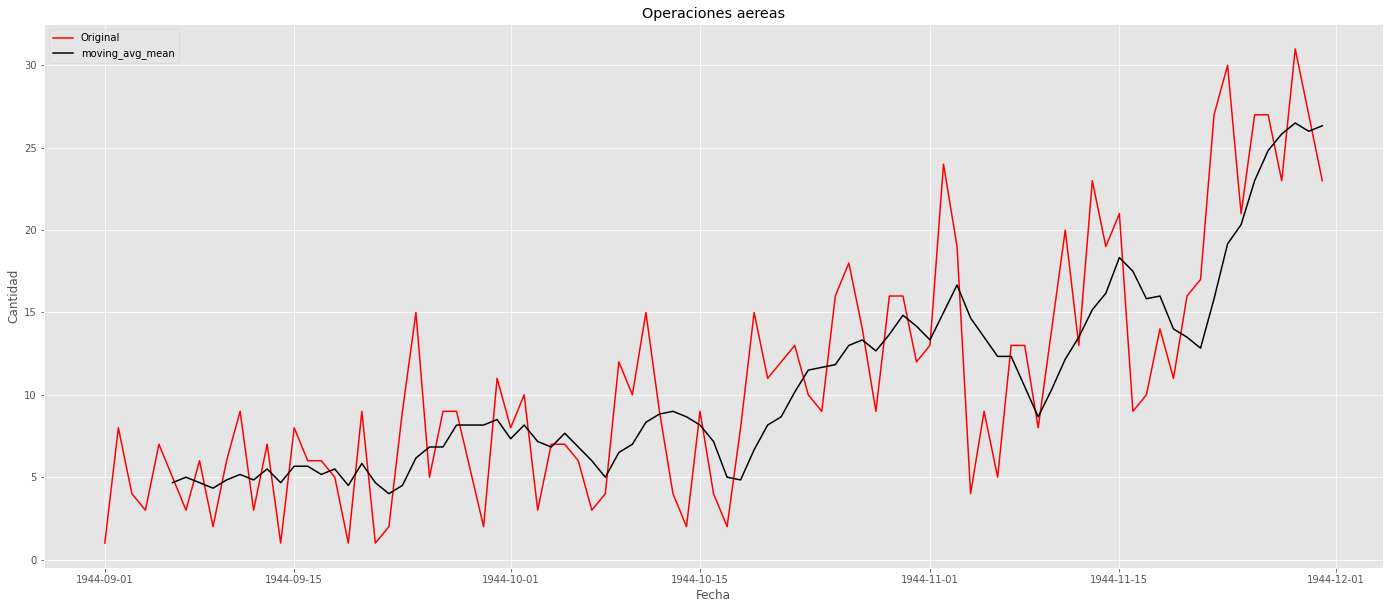

In [0]:
import pandas as pd
# Metodo Moving average
window_size = 6
moving_avg = ts4.rolling(window_size).mean()
plt.figure(figsize=(24,10))
plt.plot(ts4, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Operaciones aereas")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

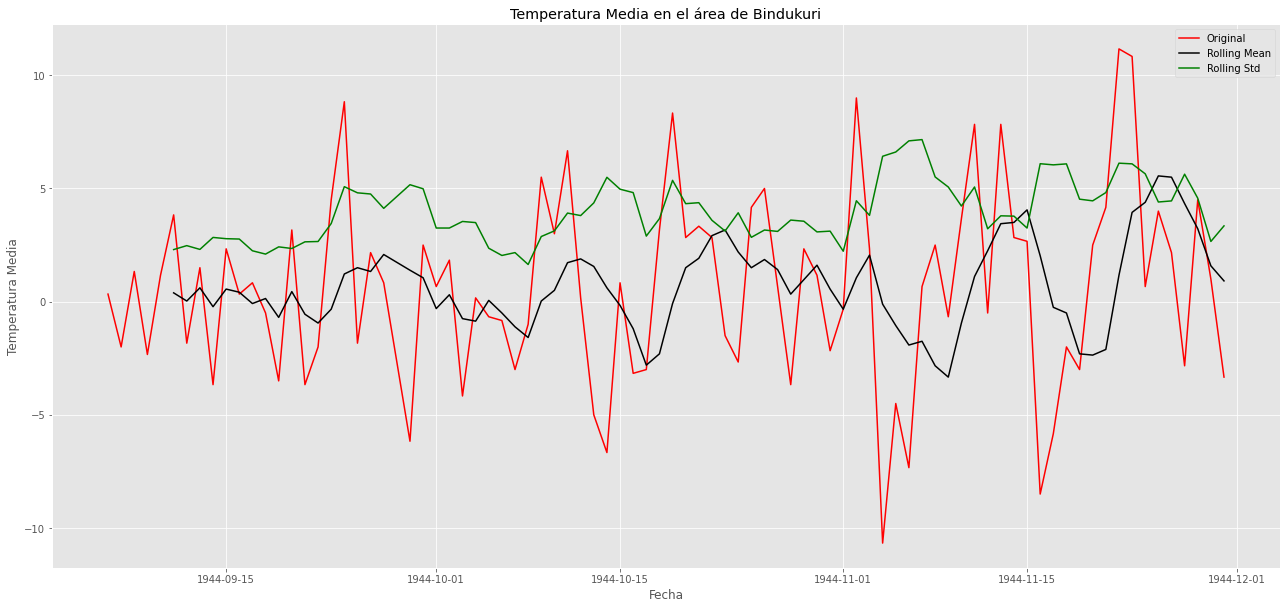

Test statistic:  -5.563013277461934
p-value:  1.5266639743405465e-06
Critical Values: {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625}


In [0]:
ts4_moving_avg_diff = ts4 - moving_avg
ts4_moving_avg_diff.dropna(inplace=True) # los primeros 6 is valores son NaN por el tamaño de ventana

# Verficar estacionaridad: media, varianza(std) y test de adfuller

check_mean_std(ts4_moving_avg_diff)
check_adfuller(ts4_moving_avg_diff.cantidadOperaciones)


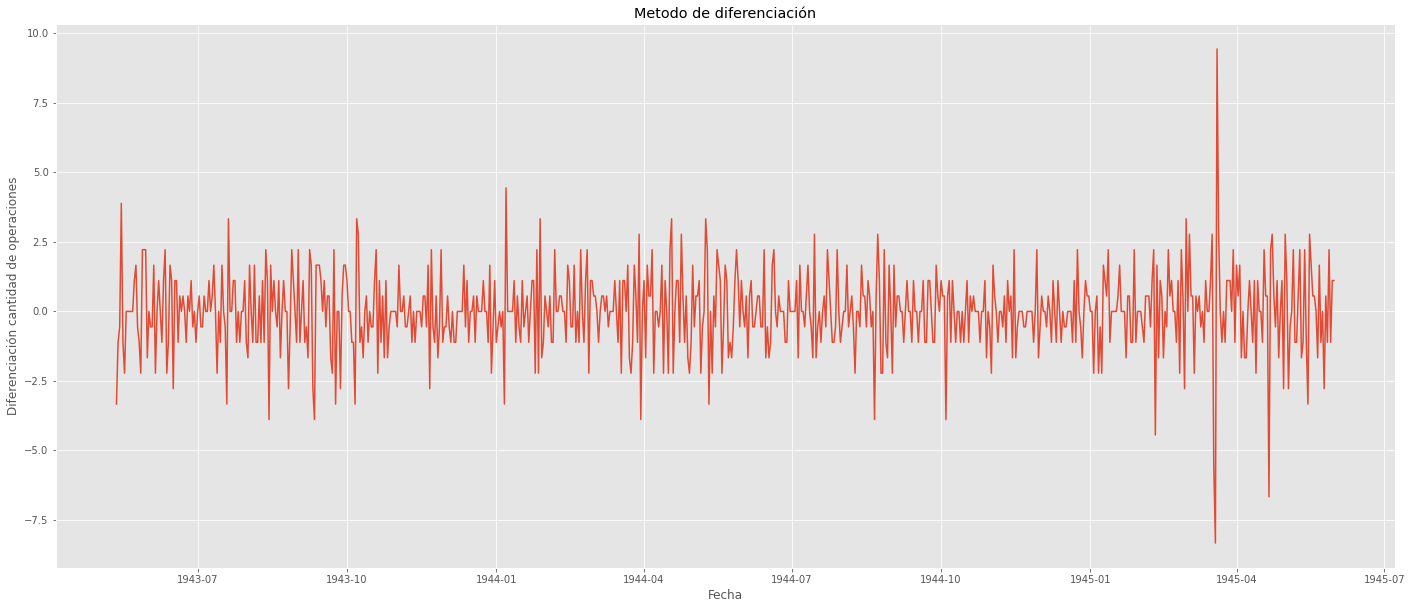

In [0]:
# Metodo de diferenciación
ts4_diff = ts4 - ts4.shift()
plt.figure(figsize=(24,10))
plt.plot(ts_diff)
plt.title("Metodo de diferenciación") 
plt.xlabel("Fecha")
plt.ylabel("Diferenciación cantidad de operaciones")
plt.show()

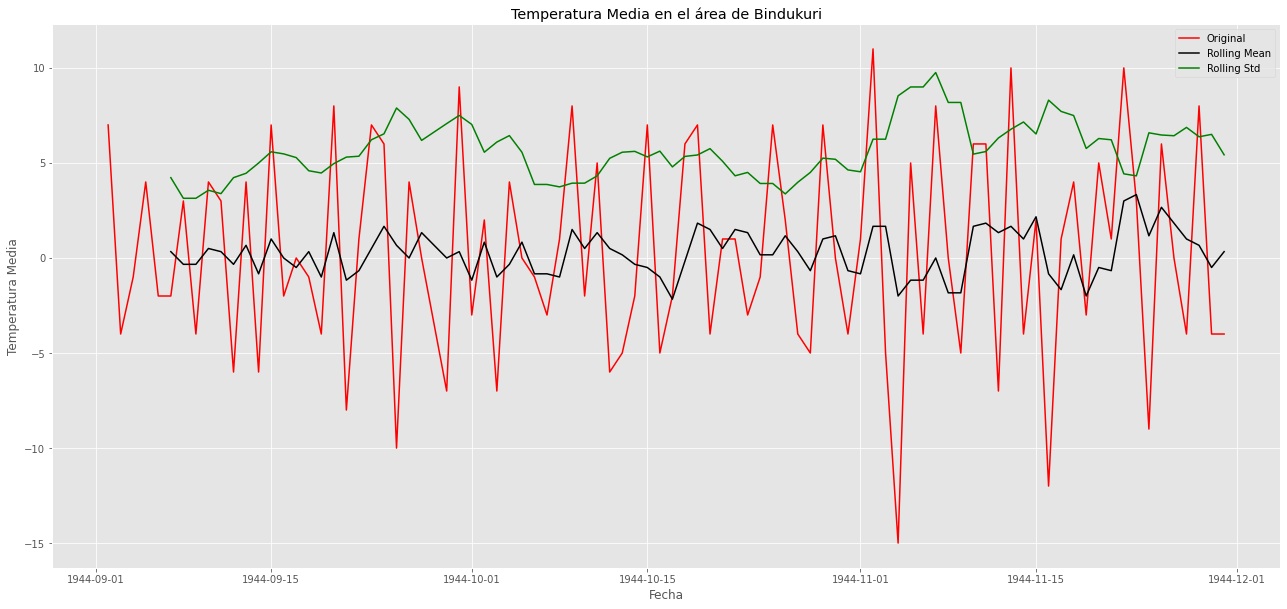

Test statistic:  -10.48943919616064
p-value:  1.1572716874309493e-18
Critical Values: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}


In [0]:
ts4_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts4_diff)
check_adfuller(ts4_diff.cantidadOperaciones)

**Concluimos que si es estacionaría debido a que el test es menor a los valores críticos**

### **Descomposición**

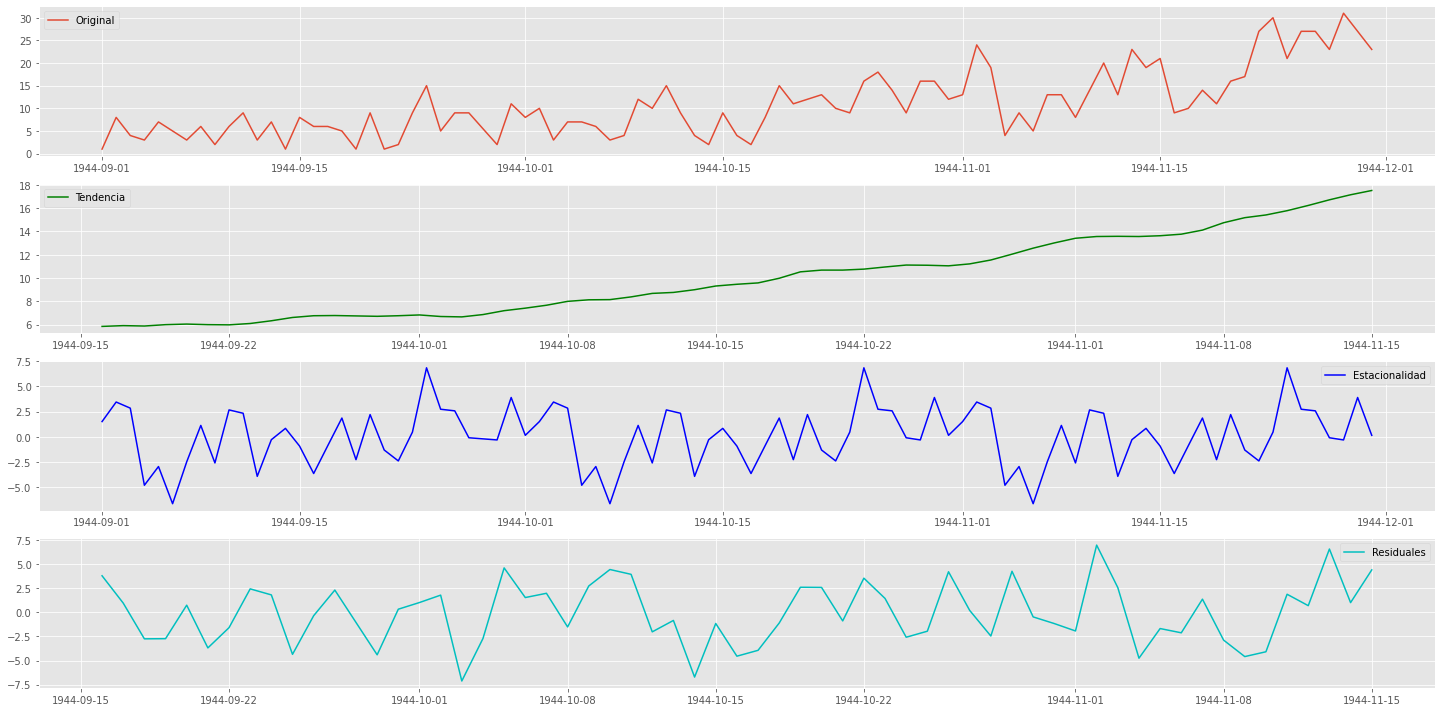

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts4,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(ts4, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendencia', c='g')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad', c='b')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuales', c='c')
plt.legend(loc='best')

plt.tight_layout()

### **<h2> Modelos y predicciones** </h2>

#### **Método de Holt's Winters**

El método de Holt, a diferencia de los métodos de media móvil y de suavización exponencial simple, es capaz de proyectar tendencias crecientes o decrecientes. EL método Holt-Winters es un método de pronóstico de triple exponente suavizante y tiene la ventaja de ser
fácil de adaptarse a medida que nueva información real está disponible. El método Holt- Winters es una extensión del método Holt que considera solo dos exponentes suavizantes. Holt-Winters considera nivel,
tendencia y estacionalidad de una determinada serie de tiempos. Este método tiene dos principales modelos, dependiendo del tipo de estacionalidad; el modelo multiplicativo estacional y el modelo aditivo estacional. El
referente trabajo se concentra en el modelo multiplicativo.

*   En fit1 elegímos no usar el optimizador y proporcionar valores explícitos para $\alpha = 0.8, \beta = 0.2$ 
*  En fit2 hacemos lo mismo que en fit1pero elegimos usar un modelo exponencial en lugar de un modelo aditivo de Holt. 
* En fit3 usamos versiones amortiguadas del modelo aditivo de Holt pero permitimos el parámetro de amortiguación ϕ para optimizar mientras se fijan los valores para $\alpha = 0.8, \beta = 0.2$ 


In [0]:
ts5 = ts4
ts5.index = pd.DatetimeIndex(ts5.index).to_period('D')

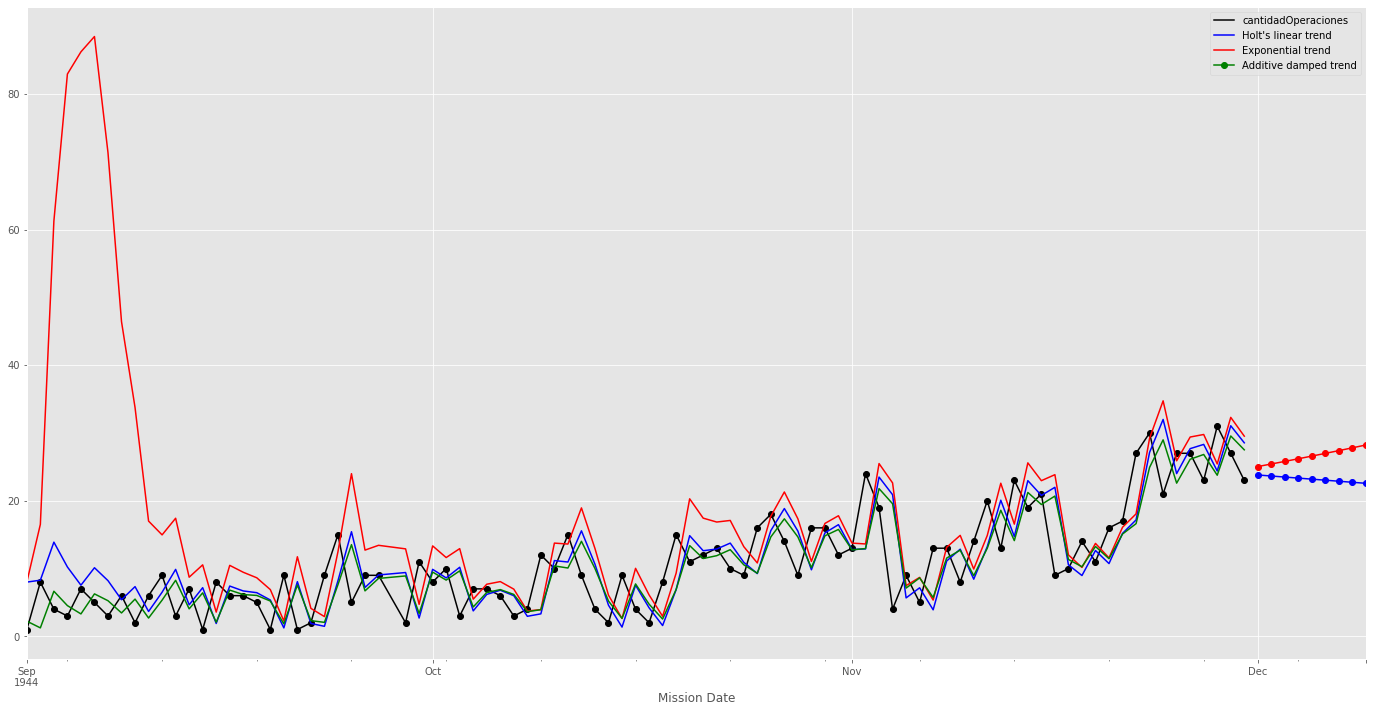

In [0]:
fit1 = Holt(ts5).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(9).rename("Holt's linear trend")
fit2 = Holt(ts5, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(9).rename("Exponential trend")
fit3 = Holt(ts5, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(9).rename("Additive damped trend")

ax = ts5.plot(color="black", marker="o", figsize=(24,12))
fit1.fittedvalues.plot(ax=ax, color='blue')
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
fit3.fittedvalues.plot(ax=ax, color='green')
fcast3.plot(ax=ax, color='green', marker="o", legend=True)

plt.show()

In [0]:
fit1 = SimpleExpSmoothing(ts5).fit()
fit2 = Holt(ts5).fit()
fit3 = Holt(ts5,exponential=True).fit()
fit4 = Holt(ts5,damped=True).fit(damping_slope=0.98)
fit5 = Holt(ts5,exponential=True,damped=False).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r'alpha',r'beta',r'phi',r'l_0','b_0','SSE'] ,columns=['SES', "Holt's", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

SES       Holt's     Additive  Multiplicative  Exponential
alpha     0.332292     0.230659     0.300922        0.736842     0.736842
beta           NaN     0.000000     0.000000        0.736842     0.736842
phi            NaN          NaN     0.980000             NaN          NaN
l_0       4.071025     3.281644     3.119675        1.000000     1.000000
b_0            NaN     0.249071     0.334327        8.000000     8.000000
SSE    2011.725171  1947.125158  1988.696003     6178.257623  6178.257623

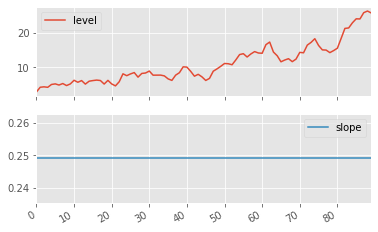

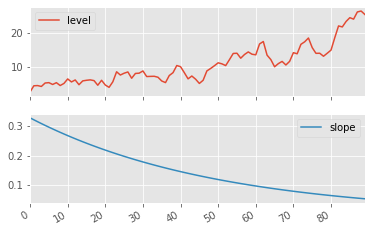

In [0]:
#permite evaluar los componentes de nivel y pendiente/tendencia de los ajustes de la tabla anterior.
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
plt.show()

Comparación

Aquí trazamos una comparación de suavizado exponencial simple y métodos de Holt para varias combinaciones aditivas, exponenciales y amortiguadas. Todos los parámetros de los modelos serán optimizados por statsmodels.

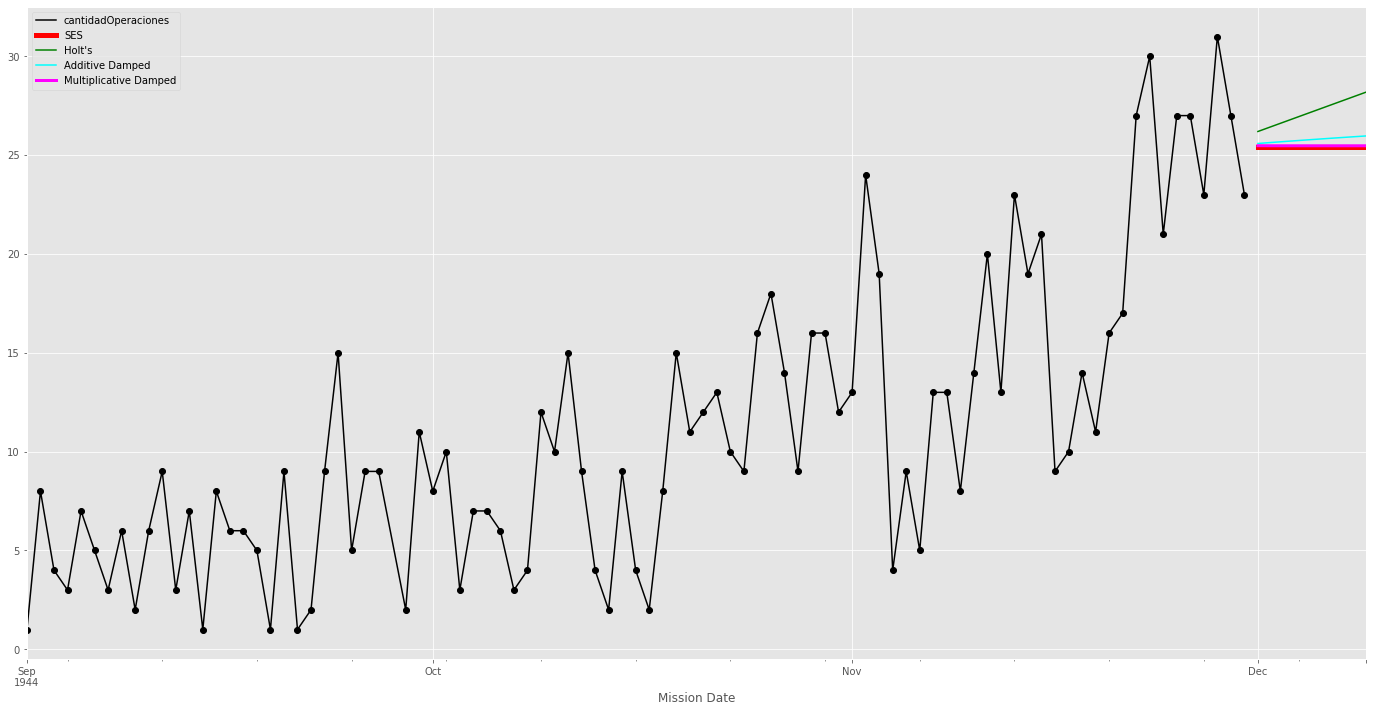

In [0]:
fit1 = SimpleExpSmoothing(ts5).fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(ts5).fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(ts5, exponential=True).fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(ts5, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(ts5, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = ts5.plot(color="black", marker="o", figsize=(24,12))
fcast1.plot(ax=ax, color='red', linewidth = 5, legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', linewidth = 3, legend=True)
plt.show()

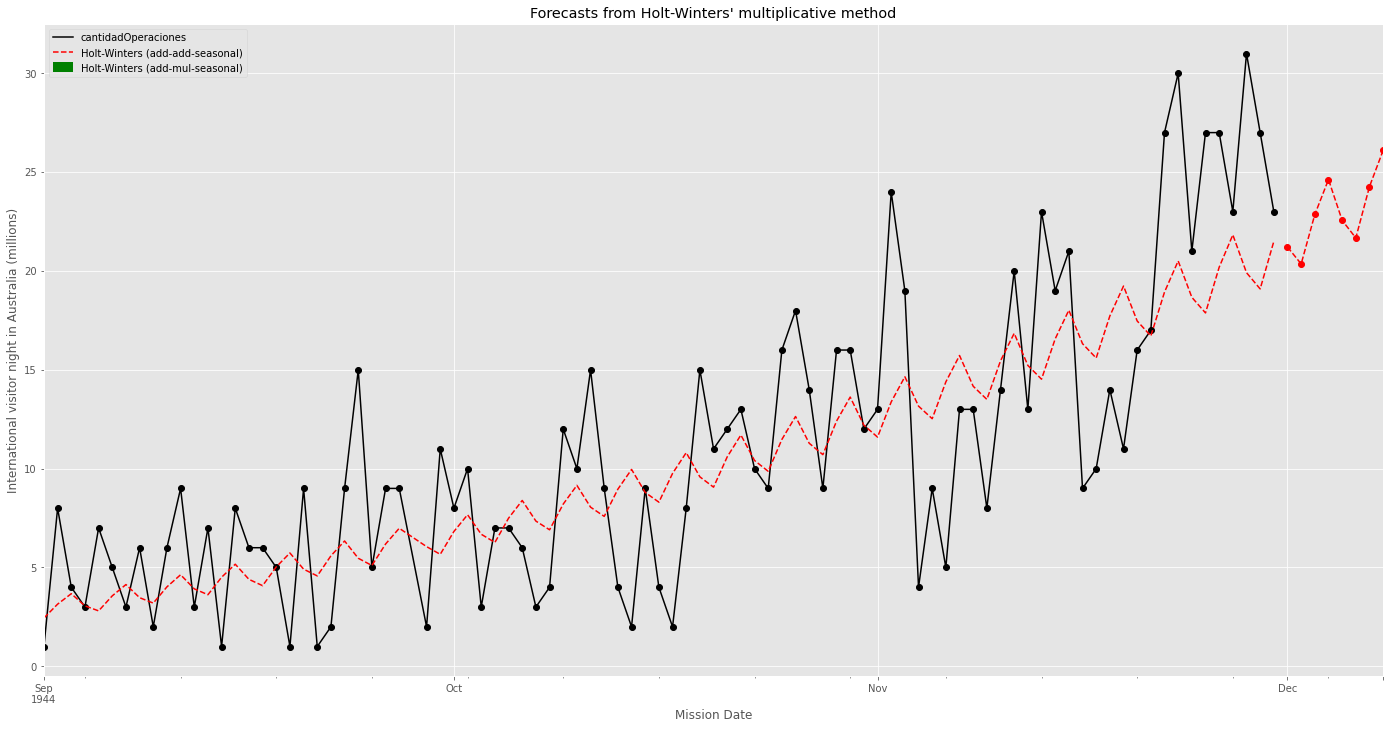

Additive  Multiplicative  Additive Dam  Multiplica Dam
alpha     0.000002        0.052632  1.110322e-09        0.052632
beta      0.000002        0.052632  6.437065e-12        0.052632
phi            NaN             NaN  1.000000e+00        0.000000
gamma     0.000002        0.000000  0.000000e+00        0.000000
l_0       2.997758        3.251639  2.961227e+00        3.251639
b_0       0.049613        0.167003  5.035193e-02             NaN
SSE    1855.324466             NaN  1.851070e+03             NaN

In [0]:
fit1 = ExponentialSmoothing(ts5, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(ts5, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(ts5, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(ts5, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
results=pd.DataFrame(index=[r"alpha",r"beta",r"phi",r"gamma",r"l_0","b_0","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = ts5.plot(figsize=(24,12), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()

results

**Análisis:** 
* Hay dos variaciones de este método que difieren en la naturaleza del componente estacional. Se prefiere el método aditivo cuando las variaciones estacionales son aproximadamente constantes a través de la serie, mientras que el método multiplicativo se prefiere cuando las variaciones estacionales cambian proporcionalmente al nivel de la serie.
* Podemos darnos cuenta por medio de la gráfica, que 3 de los 4 modelos de holts usados,Tienen un comportamiento similar incremental, y, que el modelo final que nos sirve como modelo de predicción, tiene un comportamiento estacional que incrementa con el paso del tiempo.

#### **Predicciones (ARIMA)**

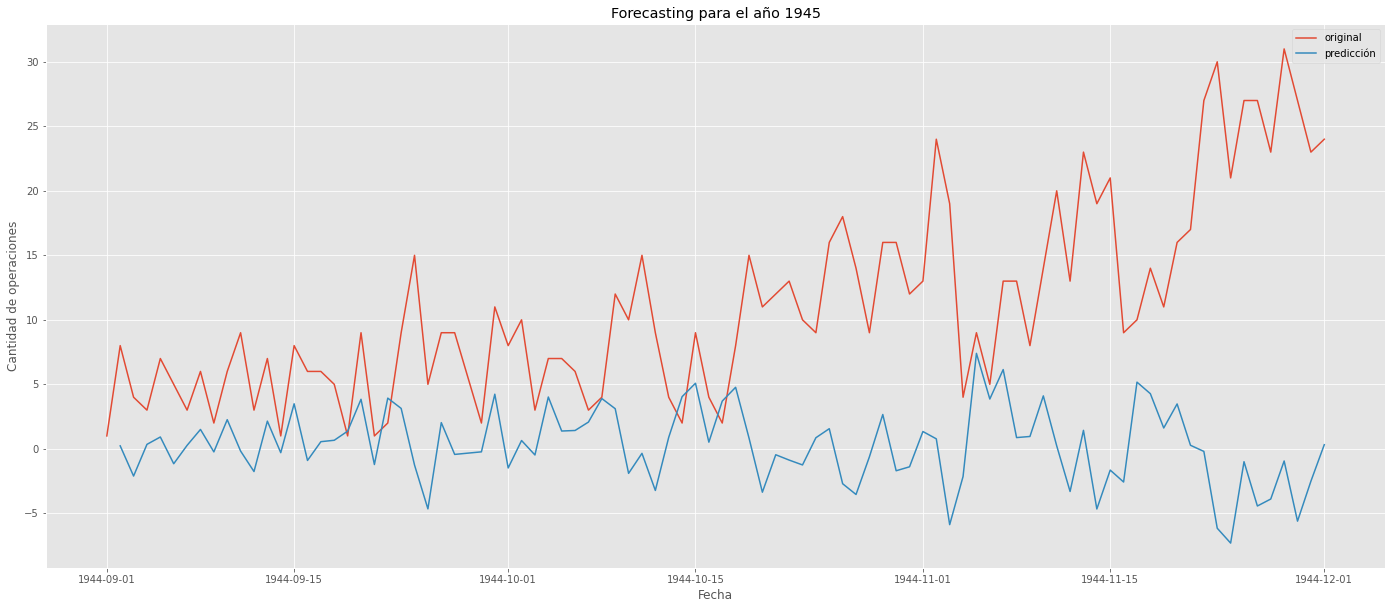

In [0]:
# ARIMA LIBRERÍA
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

#Datos de entrenamiento
ts4 = ts3.loc['1944-09-01':'1944-12-01']
train = ts4
# Entrenando el modelo ARIMA
model = ARIMA(train, order=(1,1,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# Predicción
#Se determina un rango de Test:
forecast = model_fit.predict()

# visualización
plt.figure(figsize=(24,10))
plt.plot(train,label = "original")
plt.plot(forecast,label = "predicción")
plt.title("Forecasting para el año 1945")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de operaciones")
plt.legend()
plt.show()

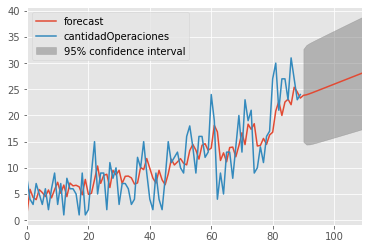

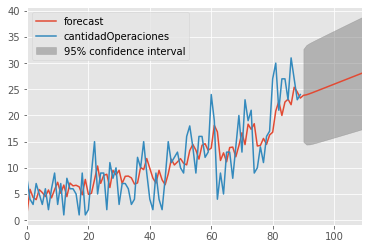

In [0]:
model_fit.plot_predict(1,110) 

Métricas de precisión (Modelo ARIMA)

In [0]:
forecast_accuracy(ts4.values, forecast)

{'evs': 0.5815432680960625,
 'mae': 3.826175412549228,
 'mape': 1.3490074305242437,
 'maxerror': 13.7248259751747,
 'meae': 3.220913471921861,
 'mse': 23.30072794340527,
 'msle': 0.29911119626443716,
 'rmse': 4.82708275704957}

**Análisis de errores:** Alrededor de 13.4% en MAPE, implica que el modelo tiene una precisión aproximada de 86.6% para predección. Para RMSE = 4.85.

#### **Predicciones (SARIMA)**


In [0]:
!pip3 install pyramid-arima

In [0]:
#Se contruye el modelo SARIMA usando pmdarima. 
#Para hacer eso, se establece la frecuencia de las series mensuales 
#y con los parametros auto_arima()seasonal=True, m=12, D=1->Por la diferenciación simple


from pyramid.arima import auto_arima
stepwise_model = auto_arima(ts4, start_p=2, start_q=1,
                           max_p=2, max_q=1, m=12,
                           start_P=1, max_P=1, start_Q=1, max_Q=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=486.524, BIC=503.021, Fit time=1.710 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=549.346, BIC=554.059, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=506.555, BIC=515.982, Fit time=0.293 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=485.215, BIC=494.642, Fit time=0.542 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=486.747, BIC=498.530, Fit time=0.554 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=517.621, BIC=524.692, Fit time=0.074 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=483.329, BIC=495.113, Fit time=1.110 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=500.317, BIC=509.744, Fit time=0.622 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=510.281, BIC=517.352, Fit time=0.453 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 

In [0]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   91
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -236.665
Date:                            Tue, 31 Mar 2020   AIC                            483.329
Time:                                    07:10:37   BIC                            495.113
Sample:                                         0   HQIC                           488.046
                                             - 91                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0527      0.023      2.269      0.023       0.007       0.098
ar.L1          0.2521      0.136      1.849      0.064      -0.015       0.519
ma.L1         -0.9999     28.512     -0.035      0.972     -56.883      54.884
ma.S.L12      -1.0000   2036.964     -0.000      1.000   -3993.377    3991.377
sigma2        17.2535   3.53e+04      0.000      1.000   -6.92e+04    6.93e+04
===================================================================================
Ljung-Box (Q):                       24.97   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.97   Prob(JB):                         0.78
Heteroskedasticity (H):               1.54   Skew:                             0.19
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El modelo ha estimado que el AIC y los valores P>|z| de los coeficientes parecen significativos. 

El mejor modelo tiene un AIC de 483.329  y los valores P son significativos.SARIMAX(1,1,1)x(0,1,1,12)

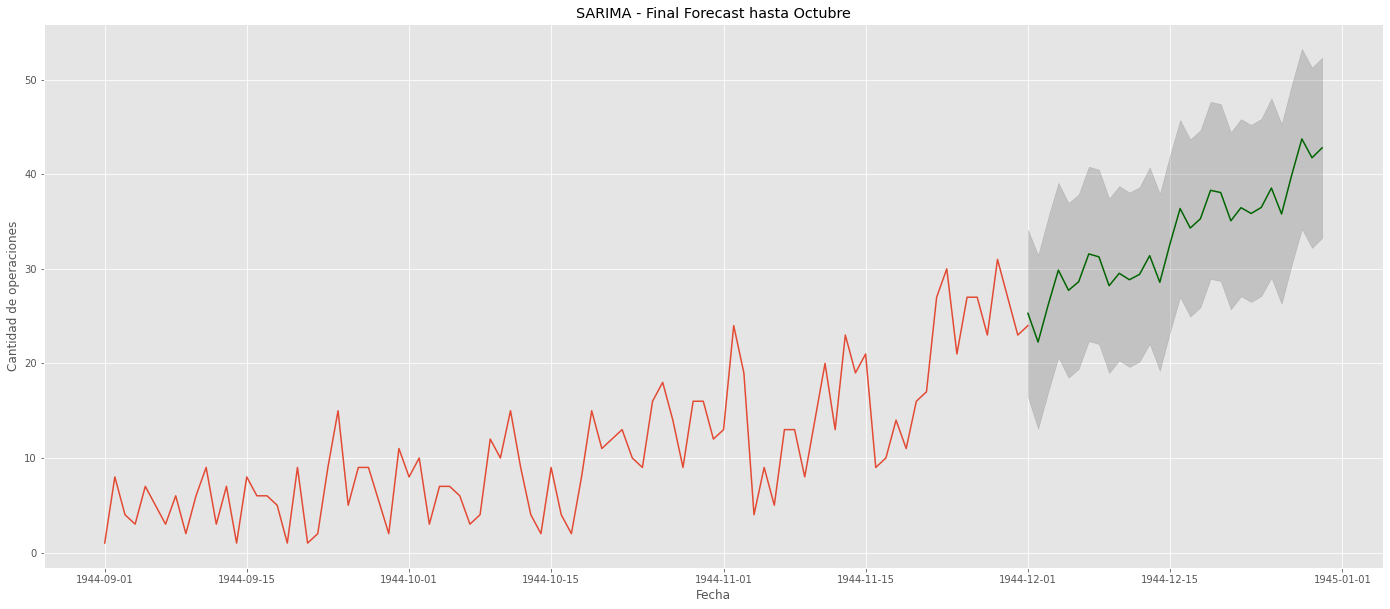

In [0]:
# Forecast para septiembre (1944/09)
n_periods = 30
TS = ts3.loc['1944-09-01':'1944-12-01']
fitted, confint = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(TS.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(24,10))
plt.plot(TS)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast hasta Octubre")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de operaciones")
plt.show()


Métricas de precisión (Modelo SARIMA)

In [0]:
fitted2 = stepwise_model.predict_in_sample()
forecast_accuracy(ts4.values, fitted2)

{'evs': 0.5697670443240413,
 'mae': 3.85905463013196,
 'mape': 1.4664058898870056,
 'maxerror': 13.070203613970891,
 'meae': 3.3941548320503,
 'mse': 23.89853804731433,
 'msle': 0.3448470516246504,
 'rmse': 4.888613100595539}

**Análisis de errores:** Alrededor de 14.6% en MAPE, implica que el modelo tiene una precisión aproximada de 85.4% para predección. Para RMSE = 4.91.



<a name="eje5" id="eje5" src="#eje2"></a>
## **Conclusiones**

* Se puede establecer un clima acorde a la época en la que la historia del juego se desarrolla, basado en datos climatológicos históricos lo que contribuye positivamente a la experiencia dentro del juego.

* Es posible determinar la cantidad de bombas que el jugador puede presenciar de manera tal que se garantice una experiencia más real.

* El clima predecido es determinado en gran medida por el último dato histórico del mismo, debido a que éste no tiene cambios bruscos en cortos periodos de tiempo.

* Los bombardeos que experimenta el jugador irán aumentando con el tiempo que este dure jugando, mostrando que de una u otra forma la dificultad del juego también es progresiva a lo largo del tiempo.

* En el notebook a modo de ejemplo se trabaja con los datos registrados sobre la ciudad de Burma pero ese mismo proceso puede ser replicado para cualquier otra ciudad en la que el jugador decida jugar.

* Dependiendo de la ciudad que el jugador decida, los datos serán diferentes y las predicciones distintas, garantizando realmente una inmersión y experiencia positiva por parte del jugador.

* Se muestra una ligera relación entre la cantidad de bombardeos y el clima presente en el momento del ataque, apreciando de forma comparativa que la cantidad de bombardeos aumenta a medida que la temperatura también lo hace. 


<a name="eje6" id="eje6" src="#eje6"></a>
## **Referencias**
* Dataset Aerial bombing operation (https://drive.google.com/open?id=1eHnl1f4S3YutEr_kMmO9-9ngdrL3uILo)
* Dataset Weather conditions in world war 2 (https://drive.google.com/open?id=1D01aO8uXxXG--LMf9laH8gSp0icRqhB1)
* Dataset Summary of weather https://drive.google.com/open?id=1N1O4rlsAct_Iq-zzCNihAAtdKpgb54z4
* Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts. Recuperado de: https://otexts.com/fpp2/